# Visualizing Real Estate And Predicting Home Prices

#### -Kris Smith
----------

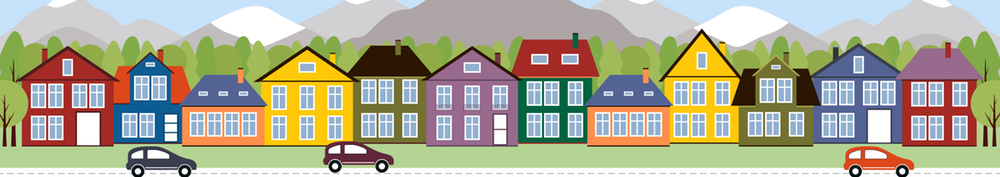
Photo by Tom Thain on Unsplash

# <ins>Data And Problem

* I have chosen the Ames Iowa(US) housing dataset. 

* This data set is hosted on Kaggle.

* The data consists of 79 attributes and a price variable(for Machine Learning). The attributes contain data on everything from utilities for each property to the zoning and population density for each property.

* The data consists of 2,919 homes.

* I would like to find some hidden correlations possibly through the process of vizualisation that may not be as obvious through typical statistical analysis.

* I would also like to possibly merge this dataset with another data set i.e.  crime database if possible.

* Searching through some of the visualization work people have shared about this data, there is a lot of correlation type visualizations. I would like to explore some geographical visualizations, maybe chloropleth for example.
    
    
---

# Pick 2-3 from below and then:
    * sketch a set of preliminary low-fidelity prototypes for addressing these tasks with the given data. You may either sketch freeform or use the Five Design Sheets approach to generate these prototypes (hand-sketched on paper is fine). Upload a copy of your sketches as part of your post. 
    
* Why is a task pursued? (goal)

    * To understand correlations between property attributes and property price.

* How is a task conducted? (means)

    * By performing correlation, regression, and statistical analysis on the data set.

* What does a task seek to learn about the data? (characteristics)

    * What attributes measured can be used to predict pricing.

* Where does the task operate? (target data)

    * The dataset is collected from a city in the midwestern US.

* When is the task performed? (workflow)

    * Afterwards based on recent historical data.
    
---
* The target question you want to answer:

    * What are the best predictors for housing prices.

* The people you would recruit to answer that question:

    * Other Data Scientists, some people within the real estate industry.

* The kinds of measures you would use to answer your data (e.g., insight depth, use cases, accuracy) and what these measures would tell you about the core question

    * Accuracy for sure at least. Backtesting predictions on historical data would be insightful.

* The approach you will use to answer that question (e.g., a journaling study, a formal experiment, etc.)

    * EDA, Machine Learning techniques, related research.

* How you would instantiate those methods (i.e., what would your participants do?)

    * Participants will answer some questions I have about their thoughts on answering this problem before hand. After I have built the model and done some EDA, how do they feel about the results they are shown? Does it confirm their thoughts on the problem from previously?

* What criteria would you use to indicate that your visualization was successful

    * The reactions and inputs given by users afterwards.


## Import Libraries

In [53]:
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy import stats
from xgboost import XGBRegressor


## Global settings
warnings.filterwarnings('ignore')
%matplotlib inline

---
## EDA

In [5]:
## Load in the data and begin exploration
df_train = pd.read_csv('../input/train.csv')

In [6]:
## List columns
print(df_train.shape)
df_train.sample(3)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
463,464,70,RL,74.0,11988,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,188700
995,996,50,RL,51.0,4712,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2006,WD,Abnorml,121600
797,798,20,RL,57.0,7677,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,110000


* It would appear that we have 81 features including the target column("Price"), and 1460 observations included in the training dataset.

* Before diving into any of the predictor variables I wanted to explore the target variable to see if there are any behaviours worth knowing.

#############################################################################################################

While 'Type' and 'Segment' is just for possible future reference, the column 'Expectation' is important because it will help us develop a 'sixth sense'. To fill this column, we should read the description of all the variables and, one by one, ask ourselves:

* Do we think about this variable when we are buying a house? (e.g. When we think about the house of our dreams, do we care about its 'Masonry veneer type'?).
* If so, how important would this variable be? (e.g. What is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).
* Is this information already described in any other variable? (e.g. If 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).

After this daunting exercise, we can filter the spreadsheet and look carefully to the variables with 'High' 'Expectation'. Then, we can rush into some scatter plots between those variables and 'SalePrice', filling in the 'Conclusion' column which is just the correction of our expectations.

I went through this process and concluded that the following variables can play an important role in this problem:

* OverallQual (which is a variable that I don't like because I don't know how it was computed; a funny exercise would be to predict 'OverallQual' using all the other variables available).
* YearBuilt.
* TotalBsmtSF.
* GrLivArea.

I ended up with two 'building' variables ('OverallQual' and 'YearBuilt') and two 'space' variables ('TotalBsmtSF' and 'GrLivArea'). This might be a little bit unexpected as it goes against the real estate mantra that all that matters is 'location, location and location'. It is possible that this quick data examination process was a bit harsh for categorical variables. For example, I expected the 'Neigborhood' variable to be more relevant, but after the data examination I ended up excluding it. Maybe this is related to the use of scatter plots instead of boxplots, which are more suitable for categorical variables visualization. The way we visualize data often influences our conclusions.

#############################################################################################################


---
## Analyzing The Target

In [7]:
## Desciptive stats
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

* It is a good sign that the *min* statistic is not zero. Meaning there is no missing values in the target column which is a good sign for analysis and modelling later on.

* Of course the obvious thing to do next is look at the distribution of *Price's*

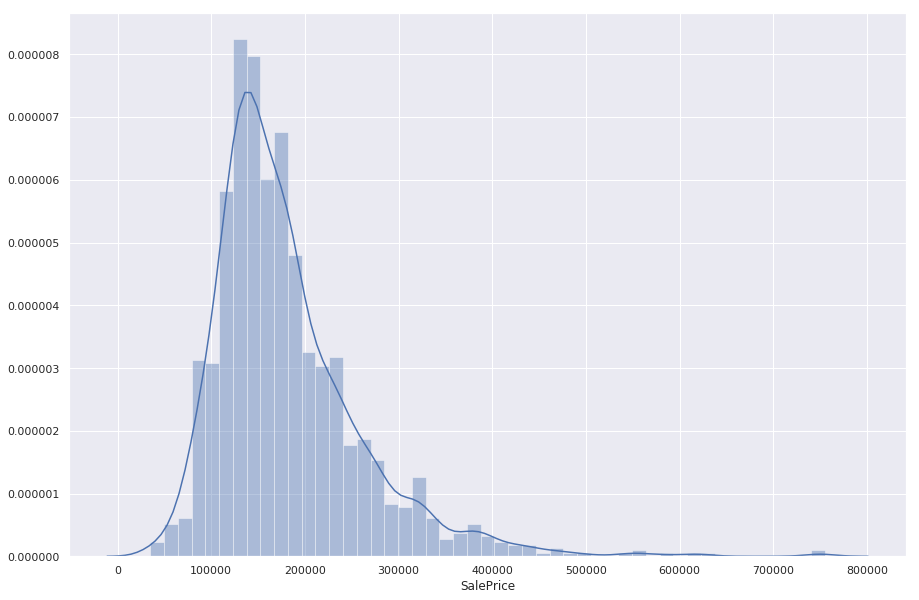

In [8]:
## Plot distribution of SalePrice
sns.set(rc={'figure.figsize':(15, 10)})
sns.distplot(df_train['SalePrice'])

* It would seem that *SalePrice* is not quite normally distributed with a **right skew**. This opens the conversation on median vs. mean statistics for modelling.

* We can also measure the skewness along with kurtosis:

In [9]:
## Kurtosis and Skewness of target variable
print("Kurtosis: %f" % df_train['SalePrice'].kurt()); print("Skewness: %f" % df_train['SalePrice'].skew())

Kurtosis: 6.536282
Skewness: 1.882876


---
## Looking At Correlations/Relationships With Other Variables

* Starting with a standard correlation heat map, we can look at some interesting collinear relationships.

* Since we are discussing visualization techniques, I will note that only one half of heatmaps are necessesary and the other half is redundant. That is why I only display half of heatmaps for readability.

* Below: `Figure 1` is a full heatmap with a redundancy. `Figure 2` is half of the heatmap masked for readability.

[Text(0.5, 1.0, 'Figure 1')]

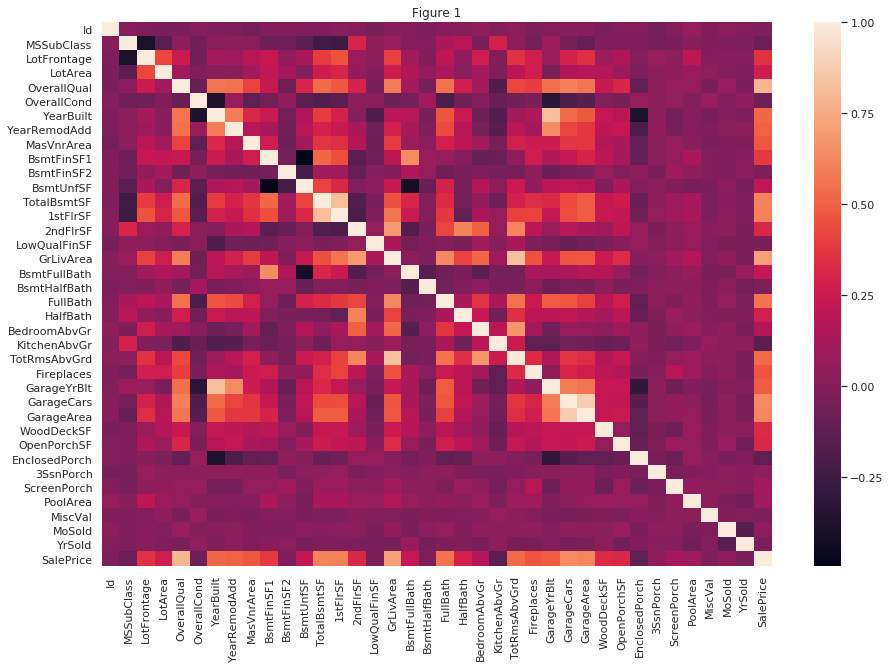

In [10]:
correlation_matrix = df_train.corr()
sns.heatmap(correlation_matrix).set(title="Figure 1")

[Text(0.5, 1.0, 'Figure 2')]

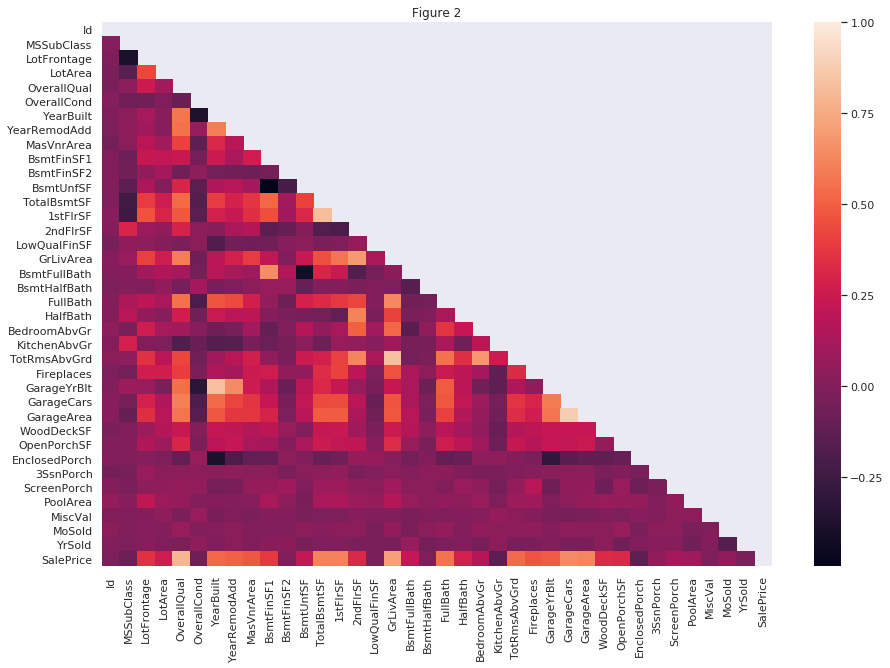

In [11]:
## Create masking object to block half of heatmap
mask = np.triu(np.ones_like(df_train.corr()))
 
## Creata a triangle correlation heatmap object
sns.heatmap(correlation_matrix, 
            annot=False, 
            mask=mask).set(
    title="Figure 2")

* Looks promising as far as having some nicely correlated features to build predictions from. Before any machine learning however we will dive in deeper and look at possible issues that may arise such as collinearity/multi-collinearity before we get too far into predictions.

---

### Numerical Features

* Correlation heatmaps are a great way to look at overall correlations values between features. Now we will look at some more detailed analysis comparing features.

* To seperate numerical features for analysis, we can create a temporary dataframe with only these variables. I started by looking at the datatypes associated with each column:

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

* The `.info()` method is a quick way to get some meta data on the entire data set. If you scroll to the bottom it gives totals for each data type.

* First of all it is worth noting how clean this dataset already is. This makes analysis and model building much much faster forcing very few feature engineering/transformation.

* After looking at the datatypes for each column we can see that any features that are numeric are either `float64` or `int64` data types.

* Using this knowledge we can plot each numeric feature against the target variable to look for obvious correlations by eye.

* During initial EDA, I previously built a pairplot of every feature in the dataset. You can imagine the number of plots involved with 81 features compared individually against one another. Although this is an important step to filter out possible collinear relationships, I will be doing this further down after filtering out many features before hand. 

* This will save time and help with interpretability and possibly holding the readers attention. 

* So below is a function created to `pairplot` if you will each feature against our target variable.

In [13]:
# # #saleprice correlation matrix
# # k = len(data.columns)/2 #number of variables for heatmap
# # cols = correlation_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
# # cm = np.corrcoef(df_train[cols].values.T)
# # sns.set(font_scale=1.05)
# # hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# # plt.show()


# k = round(len(df_train.columns)/2)
# cols = correlation_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
# df_train[cols].shape

In [14]:
## Function to plot correlations between features and target variable
def pair_plot(data, target, dtype='cat'):
    """
    Takes in a pandas dataframe, column name, and specified data type and returns 
    scatter plots for each 'numerical' feature against the target variable.
    args:
        data: a pandas dataframe
        target: the string value of the target variable to plot each feature with
        dtype: a string indicating whether to build plots for numerical or categorical features
            dtype options: categorical = 'cat', numerical = 'num'
    """
    ## Filter out lowest 50% correlated features to work with
#     k = round(len(data.columns)/2)
#     cols = correlation_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
#     data = data[cols]
    sns.set(rc={'figure.figsize':(12, 7)})

    if dtype=='num':
        ## Create dataframe of only numeric data type features from dataset
        df = data.select_dtypes(include=['int8', 'int16', 'int32', 'int64',
                                                 'float16', 'float32', 'float64'])

        for feature in df.columns:
            df = pd.concat([data[target], data[feature]], axis=1)
            df.plot.scatter(x=feature, y=target)
    else:   
        df = df_train.select_dtypes(exclude=['int8', 'int16', 'int32', 'int64',
                                                         'float16', 'float32', 'float64'])

        i = 0
        for feature in df.columns:
            var = df.columns[i]
            data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
            fig, ax = plt.subplots(figsize=(12, 7))
            fig = sns.boxplot(x=var, y="SalePrice", data=data)
            fig.axis(ymin=0, ymax=800000);
            i += 1

In [15]:
# ## Function to plot correlations between features and target variable
# def pair_plot(data, target, dtype='cat'):
#     """
#     Takes in a pandas dataframe, column name, and specified data type and returns 
#     scatter plots for each 'numerical' feature against the target variable.
#     args:
#         data: a pandas dataframe
#         target: the string value of the target variable to plot each feature with
#         dtype: a string indicating whether to build plots for numerical or categorical features
#             dtype options: categorical = 'cat', numerical = 'num'
#     """

#     if dtype=='num':
#         ## Create dataframe of only numeric data type features from dataset
#         df = data.select_dtypes(include=['int8', 'int16', 'int32', 'int64',
#                                                  'float16', 'float32', 'float64'])

#         for feature in df.columns:
#             df = pd.concat([data[target], data[feature]], axis=1)
#             df.plot.scatter(x=feature, y=target)
#     else:
#         df = data.select_dtypes(exclude=['int8', 'int16', 'int32', 'int64',
#                                                          'float16', 'float32', 'float64'])

#         i = 0
#         for feature in df.columns:
#             var = df.columns[i]
#             data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
#             fig, ax = plt.subplots(figsize=(10, 7))
#             fig = sns.boxplot(x=var, y="SalePrice", data=data)
#             fig.axis(ymin=0, ymax=800000);
#             i += 1

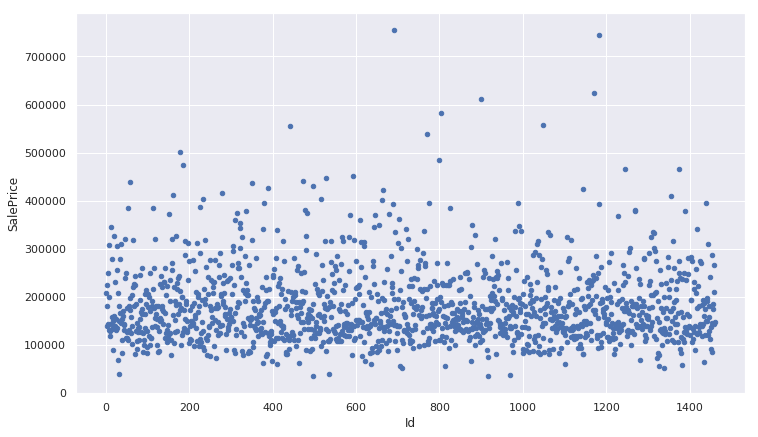

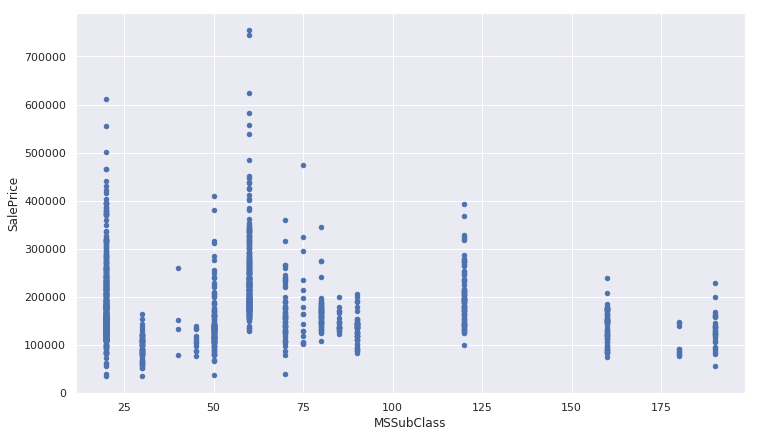

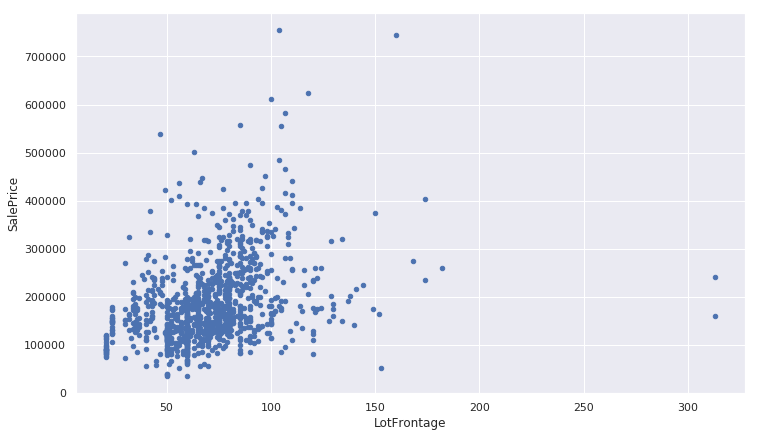

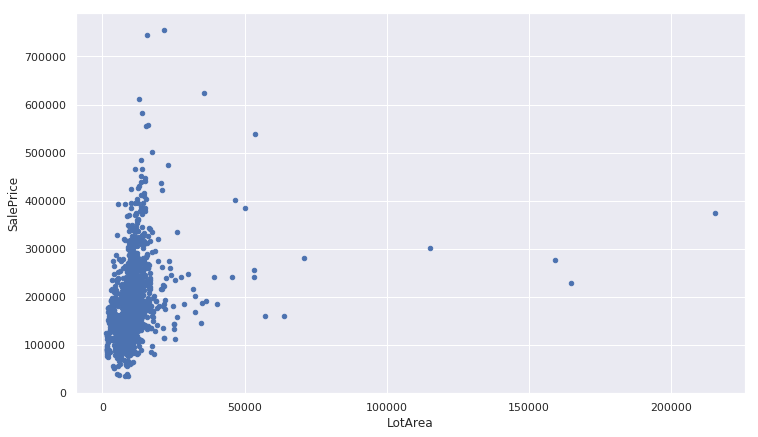

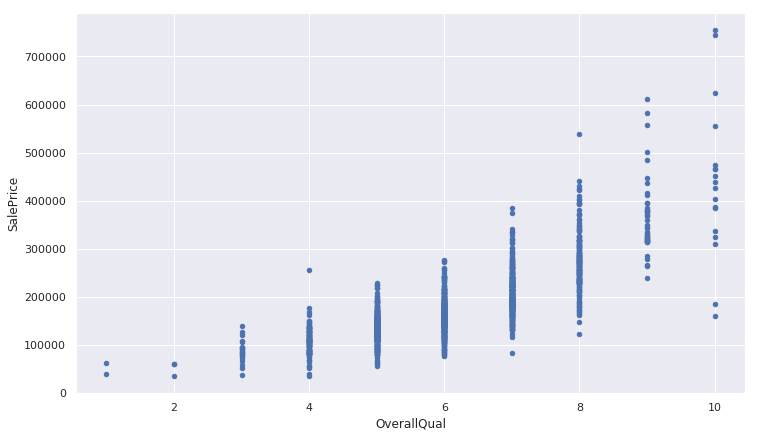

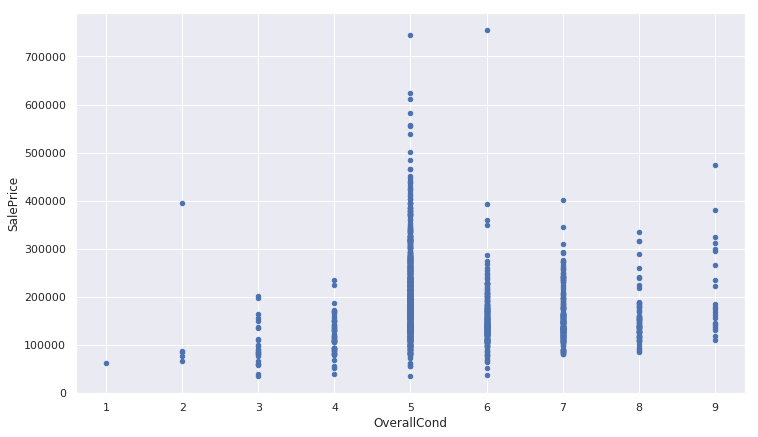

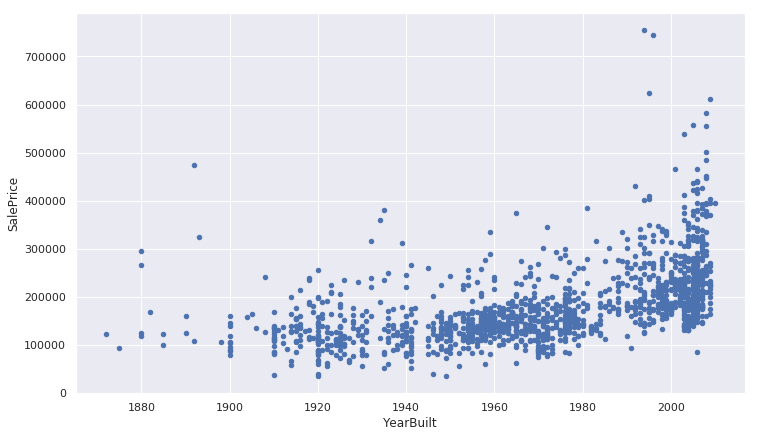

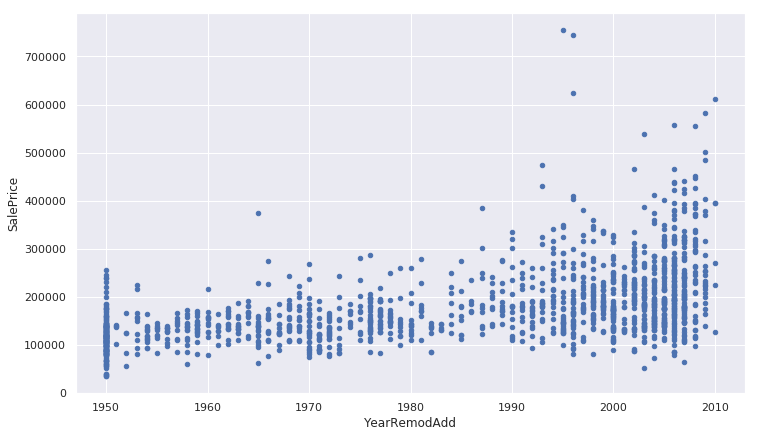

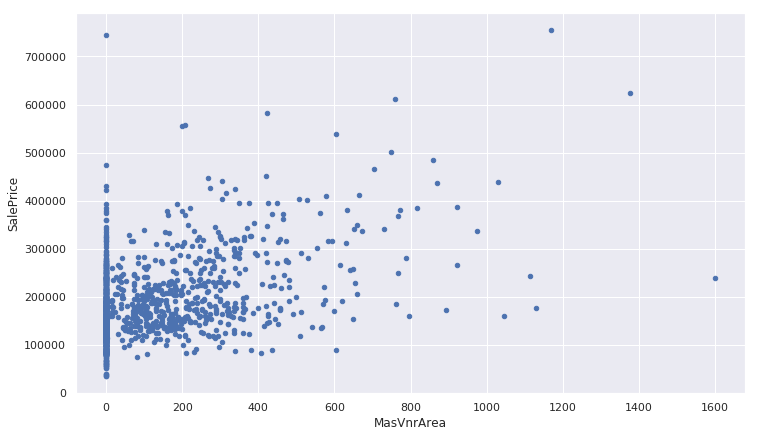

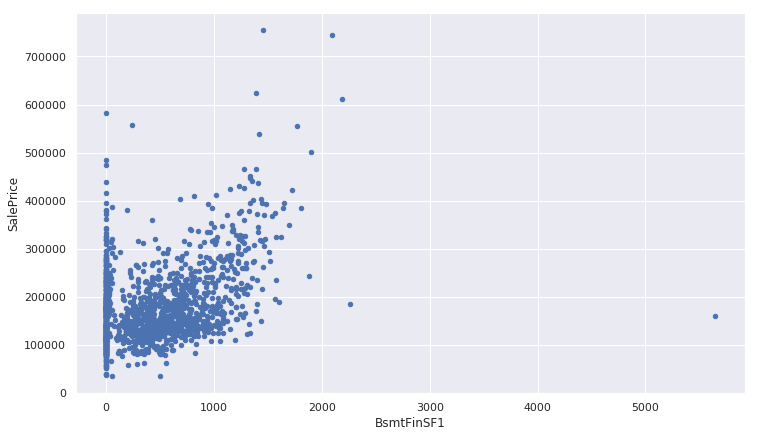

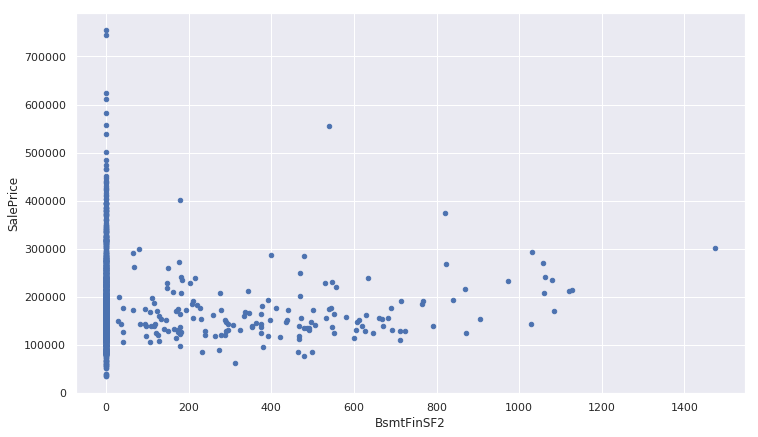

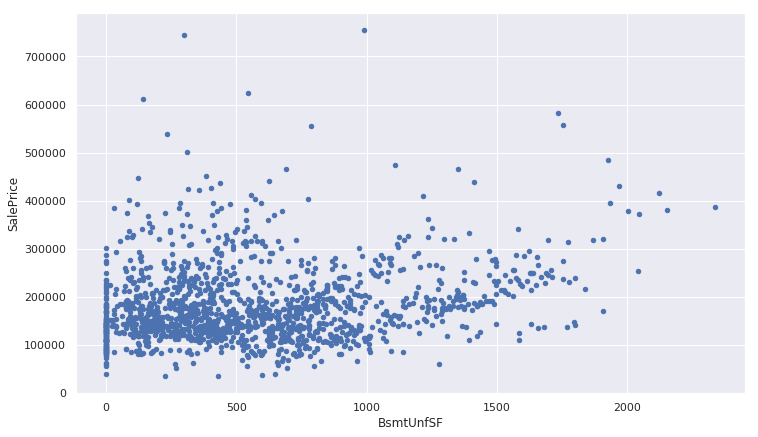

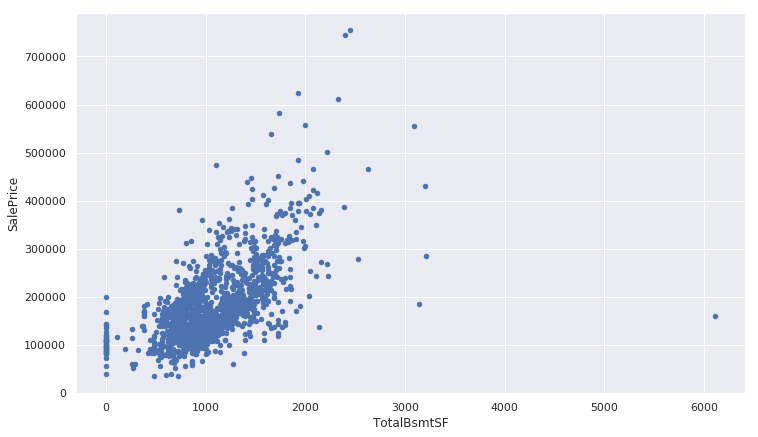

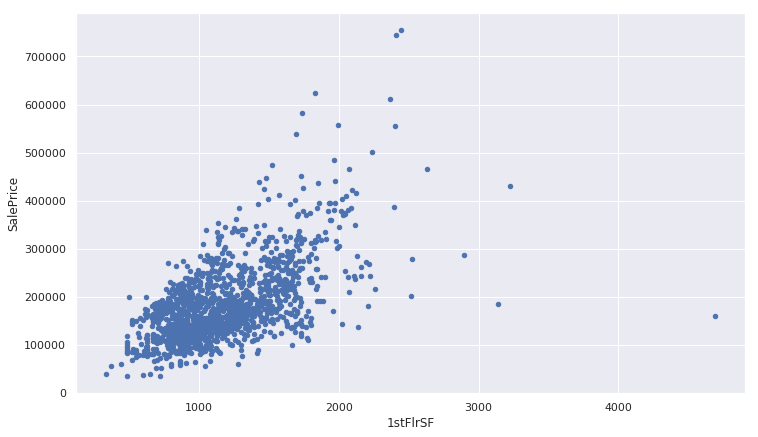

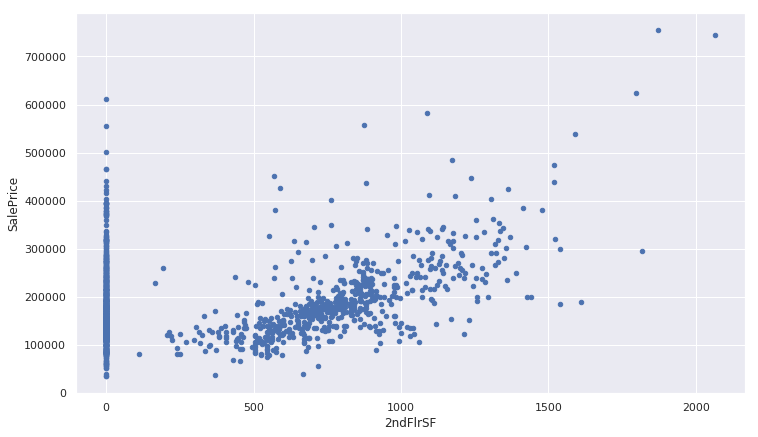

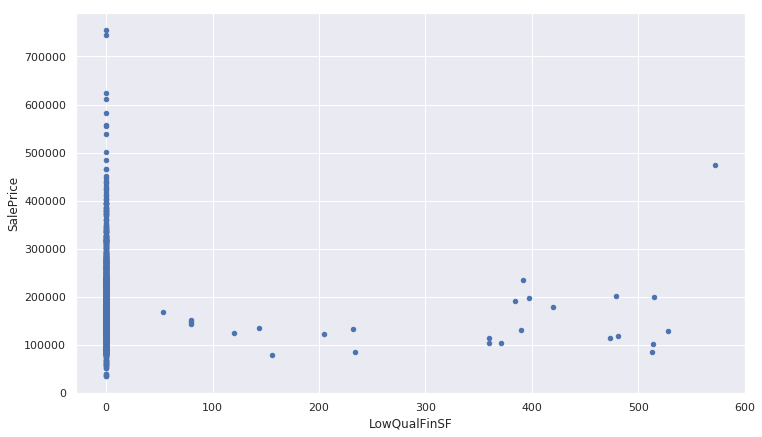

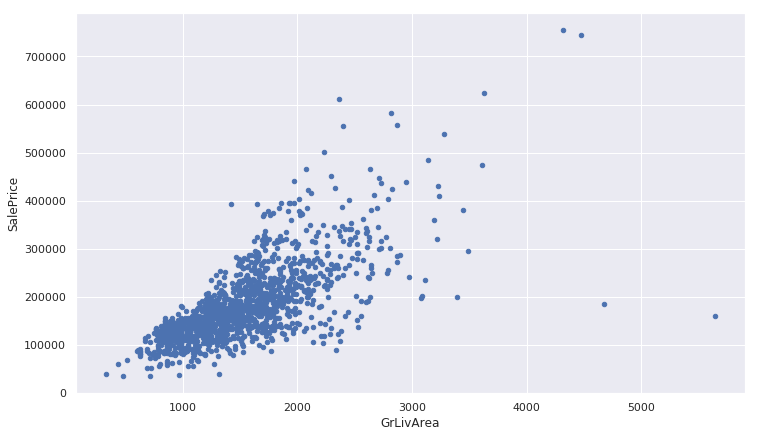

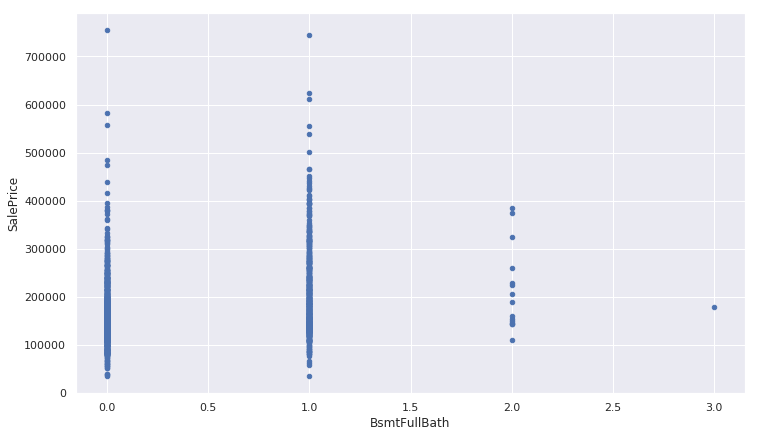

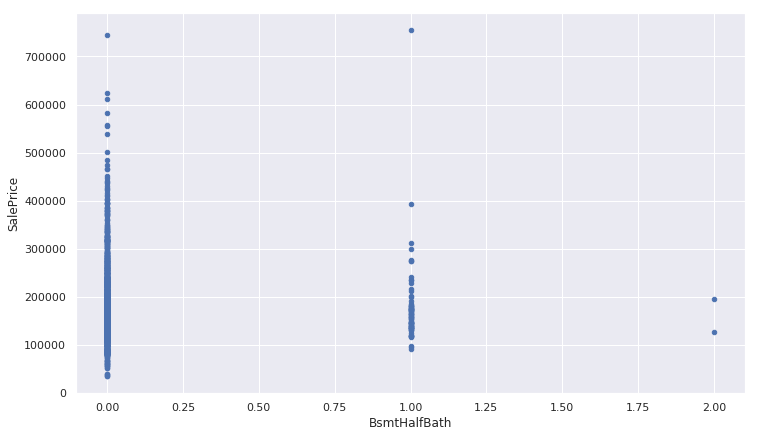

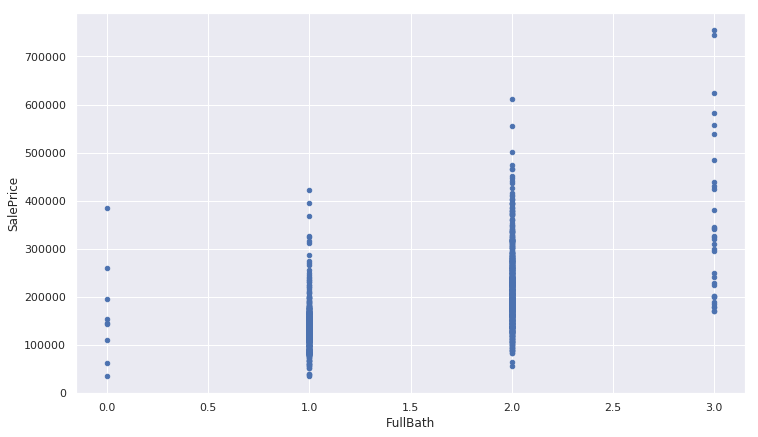

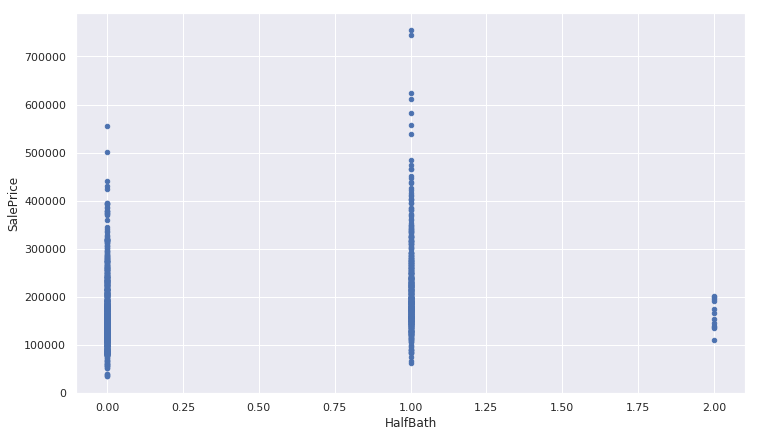

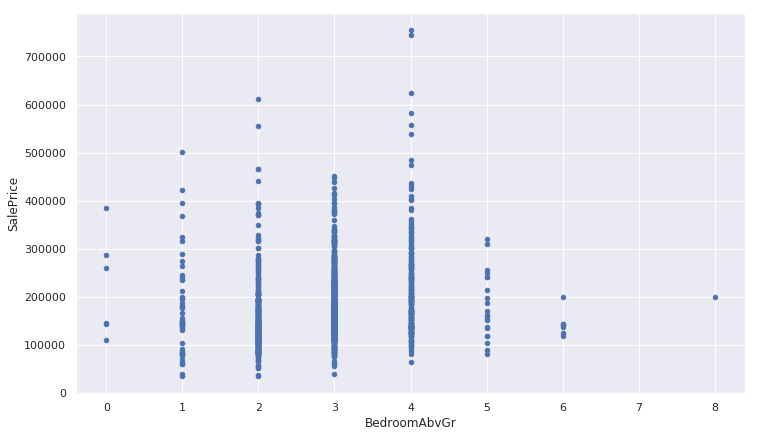

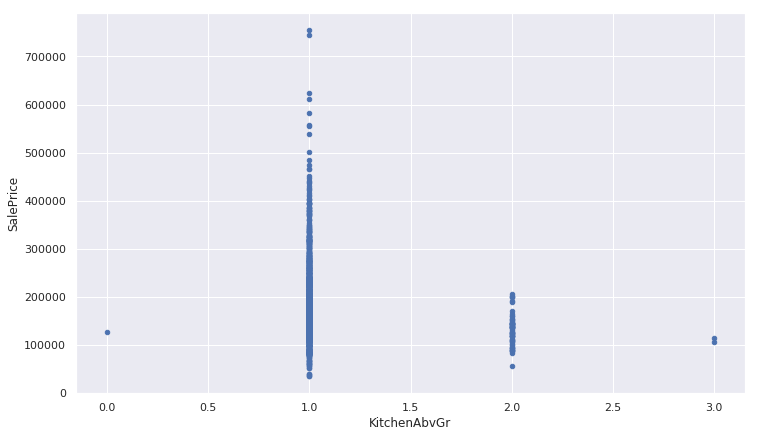

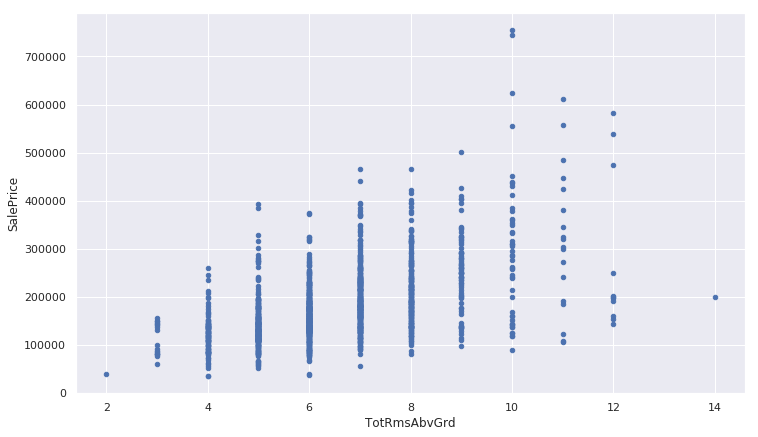

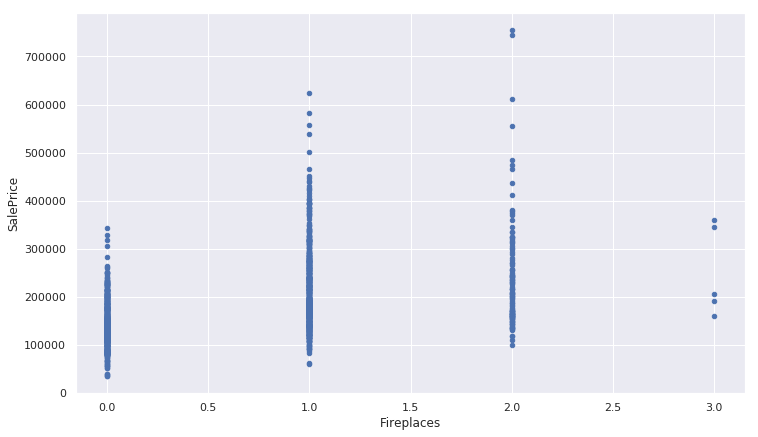

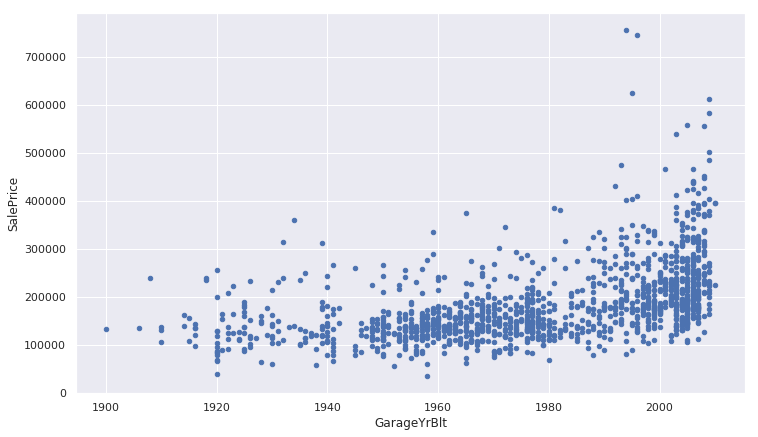

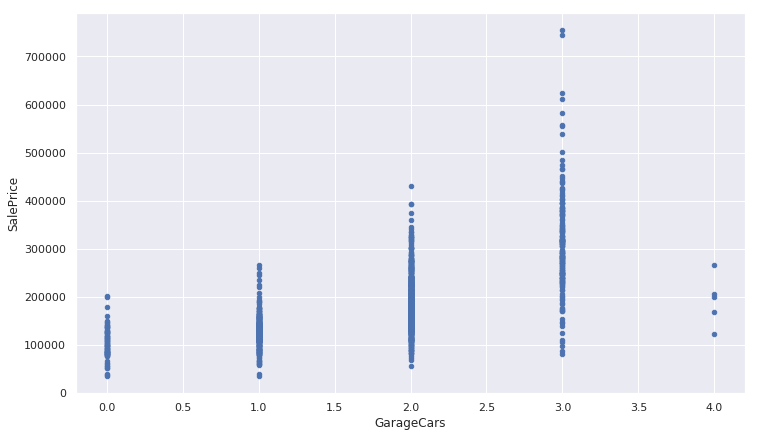

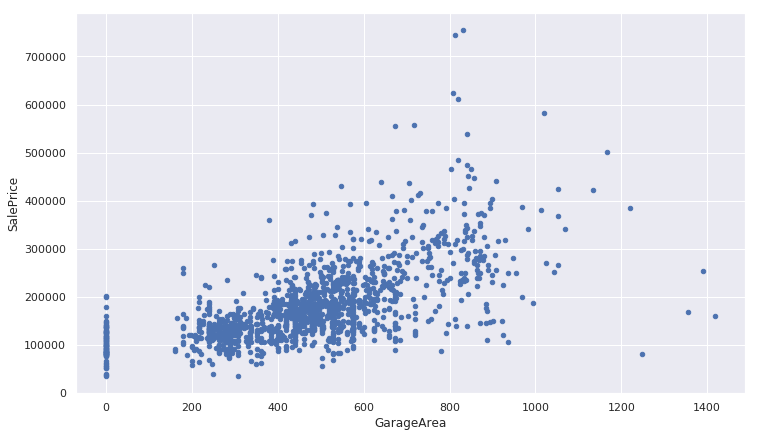

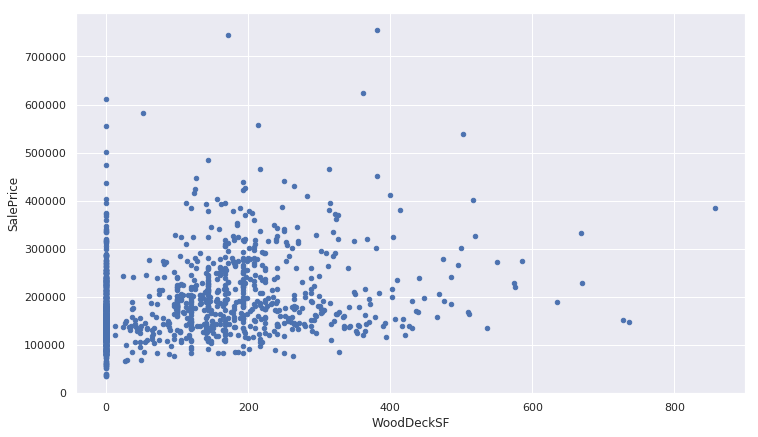

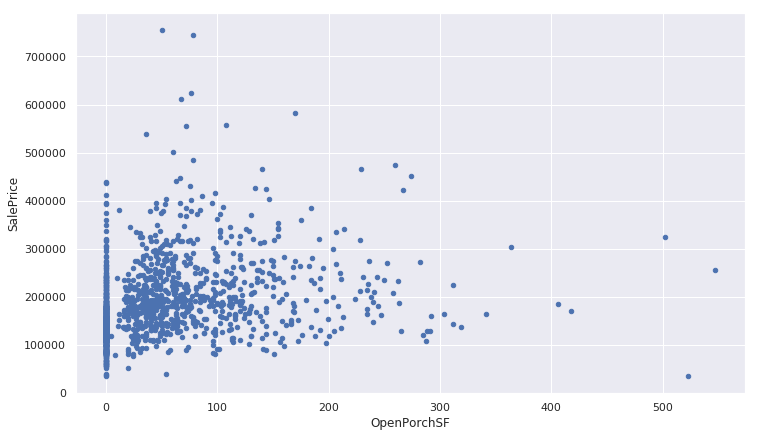

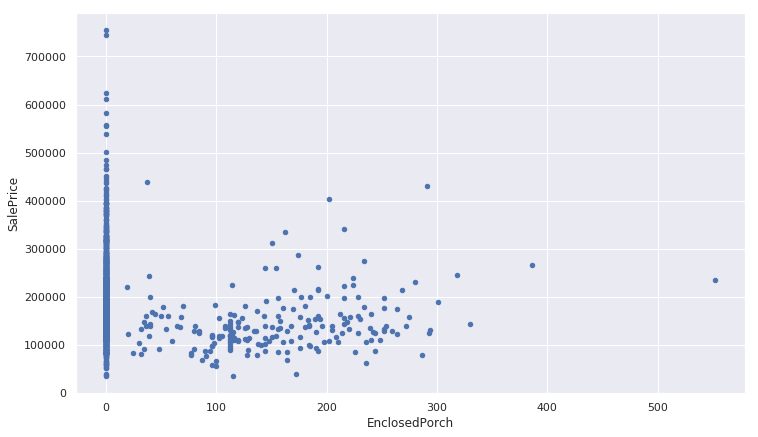

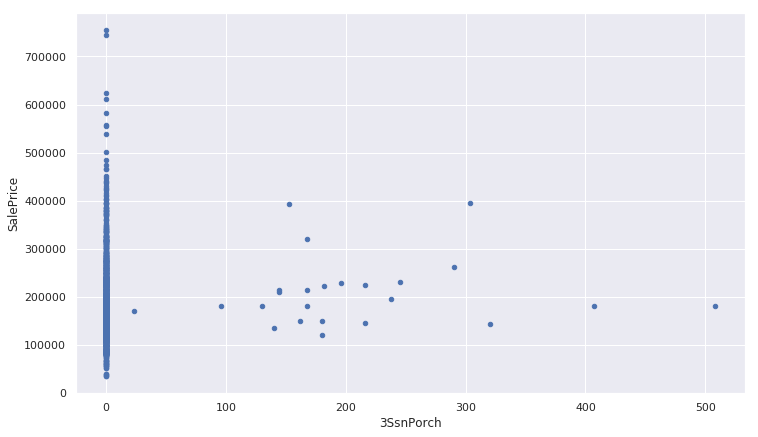

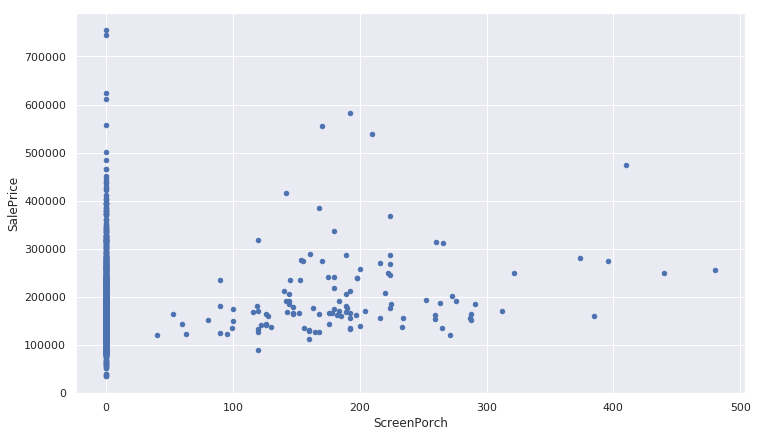

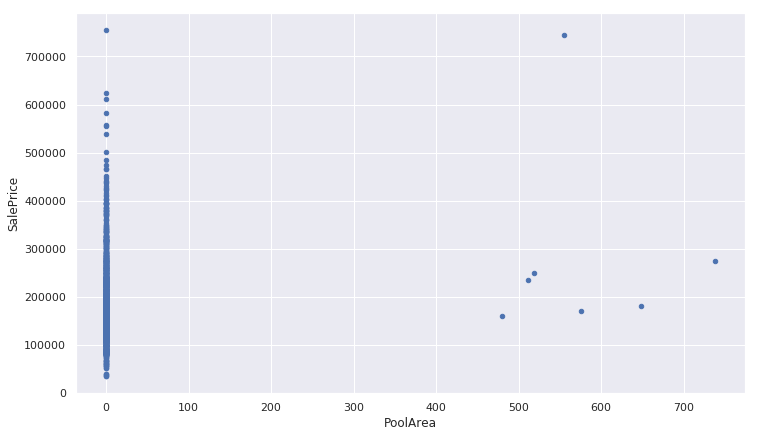

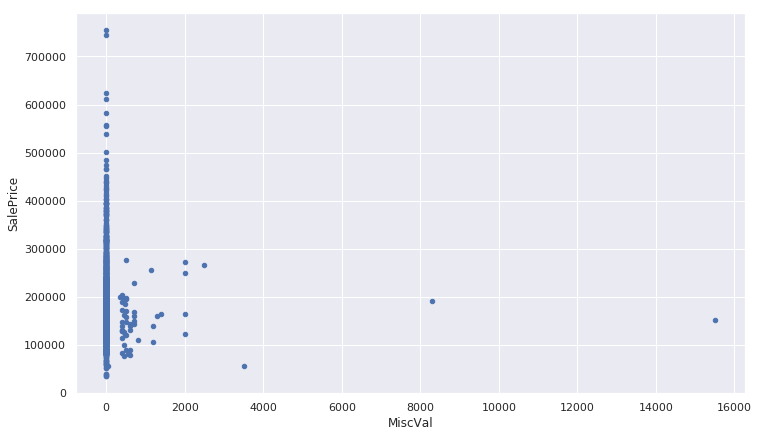

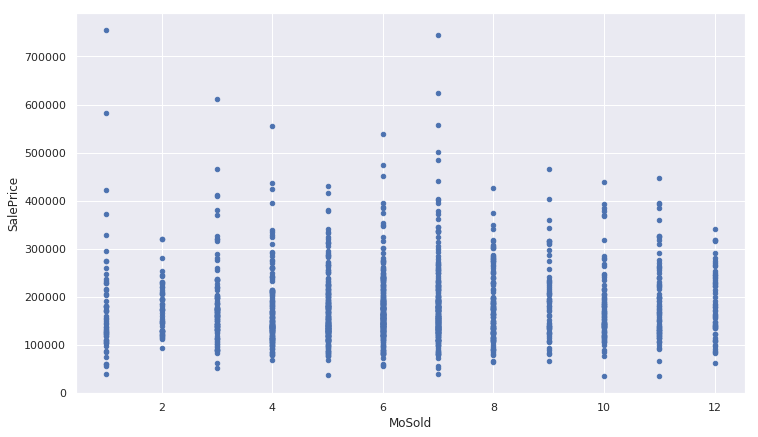

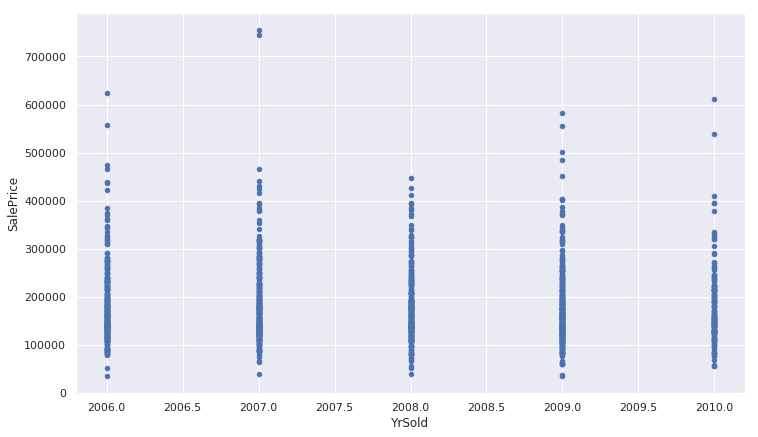

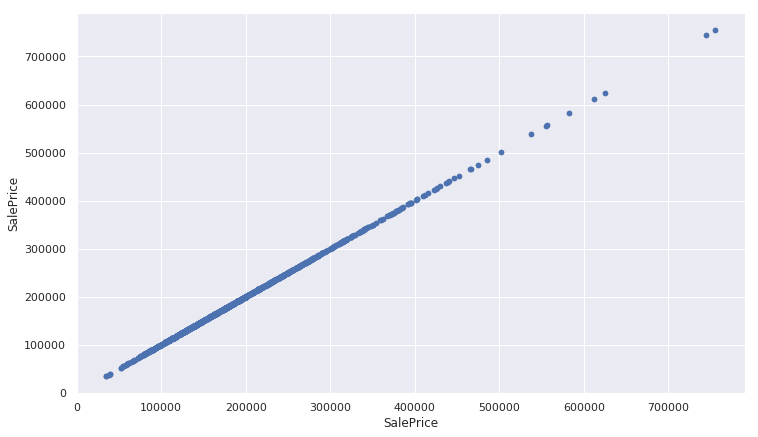

In [16]:
## Call custom pairplotting function
pair_plot(df_train, 'SalePrice', dtype='num')

* Sorry to make you scroll through all of that but it does reveal some great insights into the correlations between features. And also it is way better than the original `81X81` classic pairplot featuring every single interaction between every feature.

* It does appear that there are many positively correlated features with `SalePrice`. Many which have to do with size or area of a room or feature of a house. Some examples are living room size, screened porch size, etc.

* Also those having to do with quantities. These include number of vehicles(garage size), number of bathrooms, and of course number of rooms overall in the house.

* After thinking about this from a design standpoint, would it be better to put these plots side by side in gridlike fashion such as a traditional pairplot?


---
### Categorical Features

* Now that we have some basic features we like to explore further on the numerical side, let's see if we can find some categorical features we like as possible predictors as well.

In [17]:
# ## Function to plot correlations between features and target variable
# def pair_plot(data, target, dtype='cat'):
#     """
#     Takes in a pandas dataframe, column name, and specified data type and returns 
#     scatter plots for each 'numerical' feature against the target variable.
#     args:
#         data: a pandas dataframe
#         target: the string value of the target variable to plot each feature with
#         dtype: a string indicating whether to build plots for numerical or categorical features
#             dtype options: categorical = 'cat', numerical = 'num'
#     """
#     if dtype=='num':
#         ## Create dataframe of only numeric data type features from dataset
#         df = data.select_dtypes(include=['int8', 'int16', 'int32', 'int64',
#                                                  'float16', 'float32', 'float64'])

#         for feature in df.columns:
#             df = pd.concat([data[target], data[feature]], axis=1)
#             df.plot.scatter(x=feature, y=target)
#     else:   
#         df = df_train.select_dtypes(exclude=['int8', 'int16', 'int32', 'int64',
#                                                          'float16', 'float32', 'float64'])

#         i = 0
#         for feature in df.columns:
#             var = df.columns[i]
#             data = pd.concat([data['SalePrice'], data[var]], axis=1)
#             fig, ax = plt.subplots(figsize=(10, 7))
#             fig = sns.boxplot(x=var, y="SalePrice", data=data)
#             fig.axis(ymin=0, ymax=800000)
#             i += 1

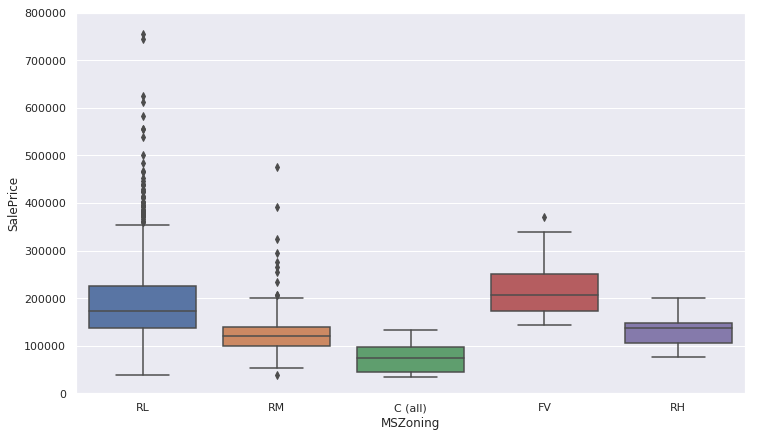

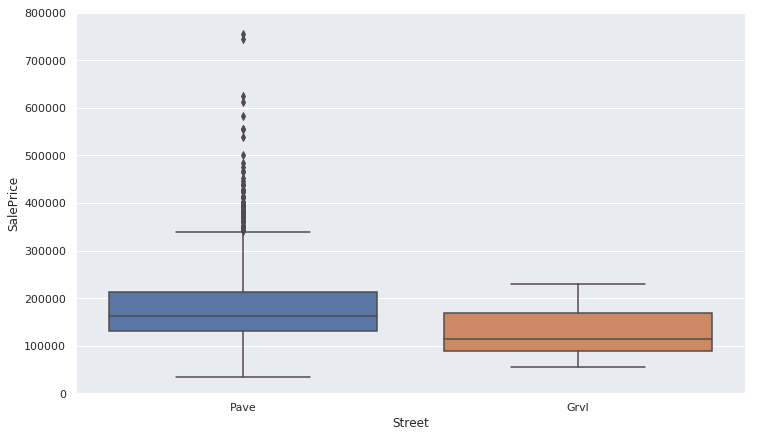

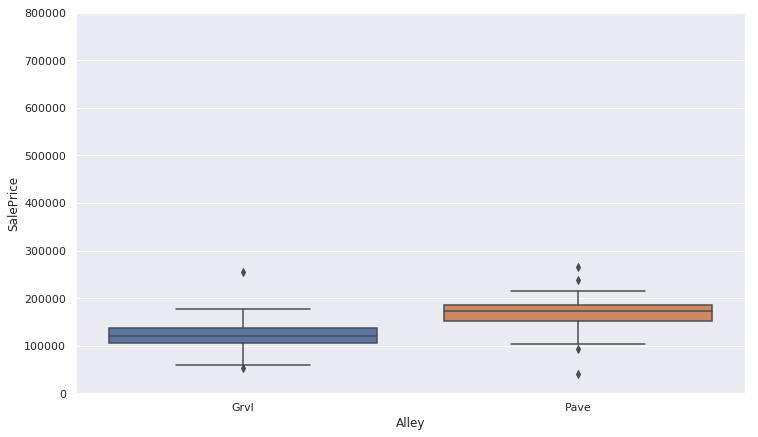

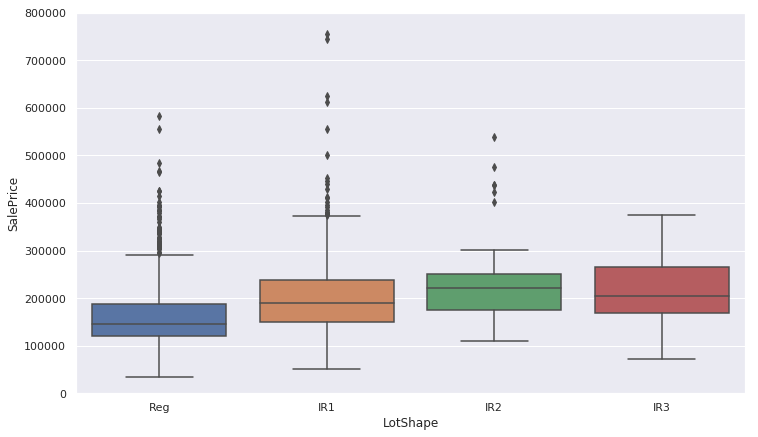

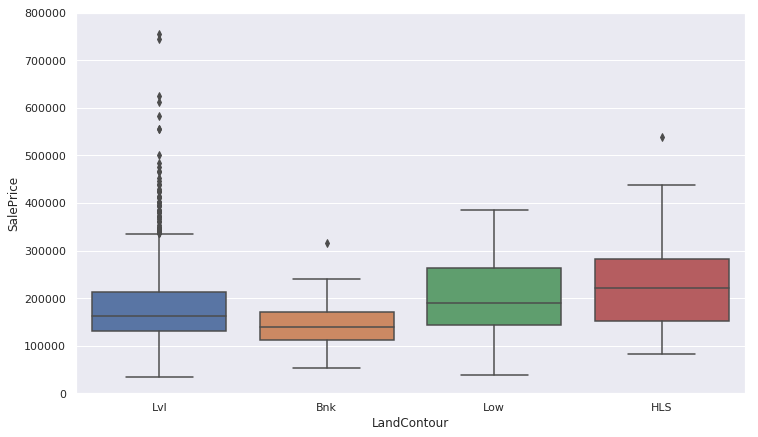

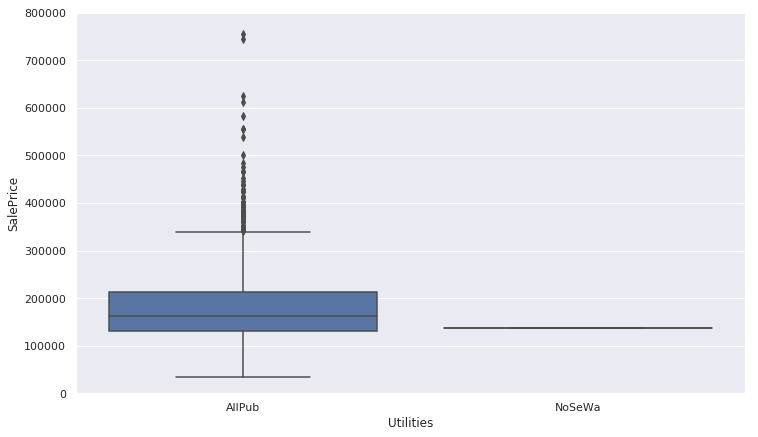

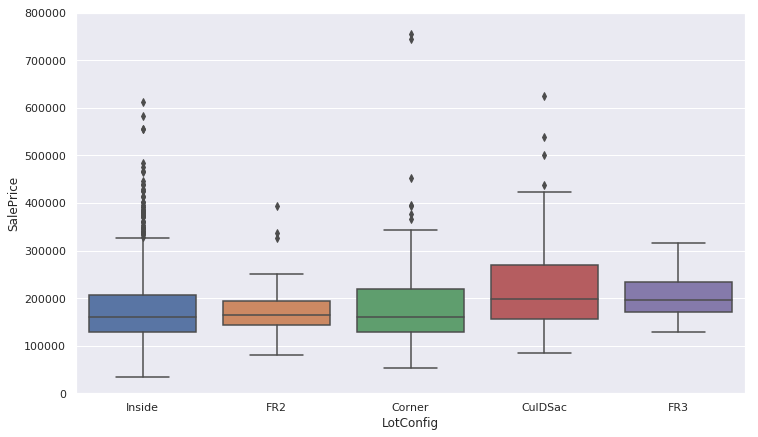

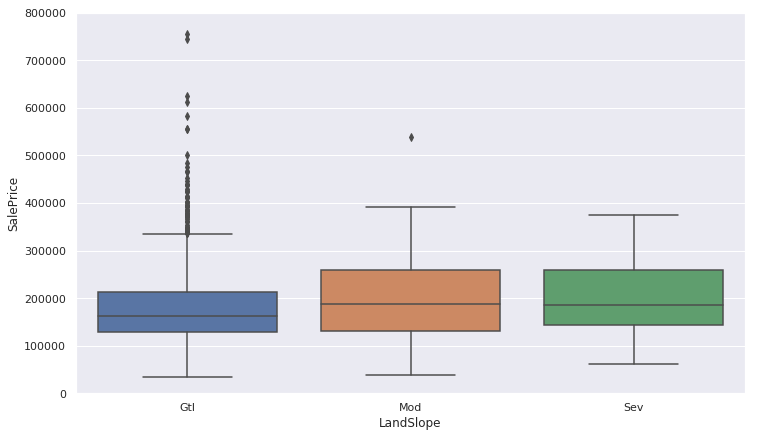

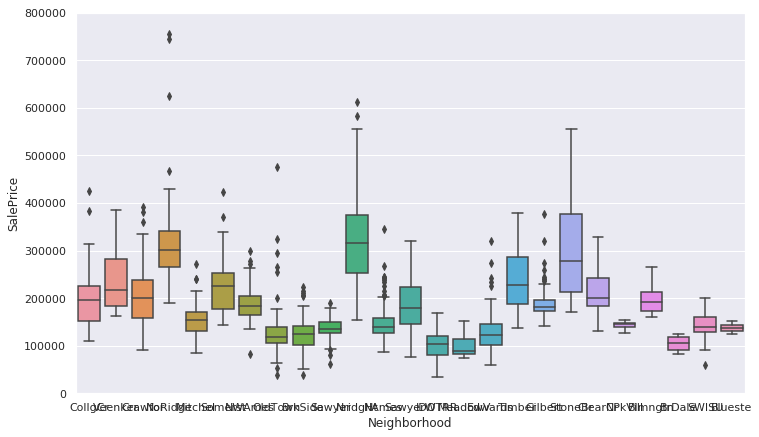

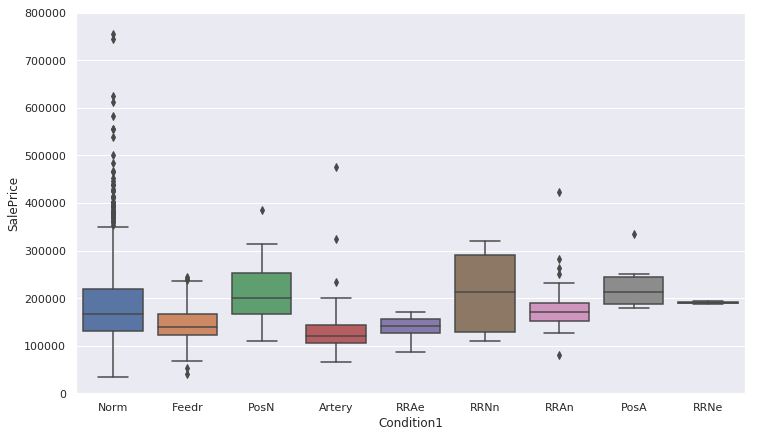

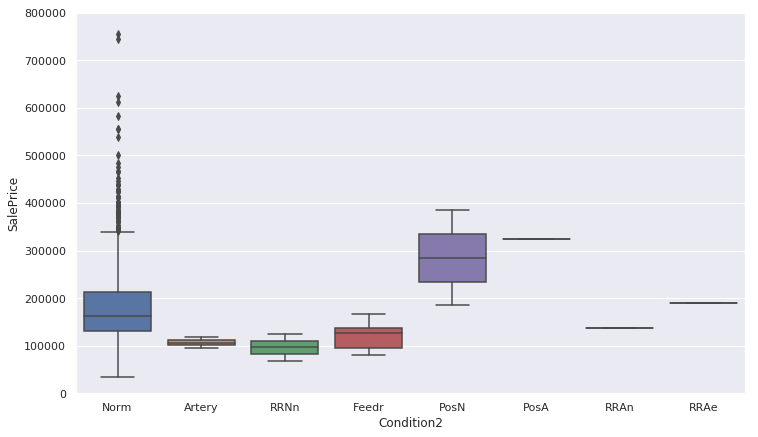

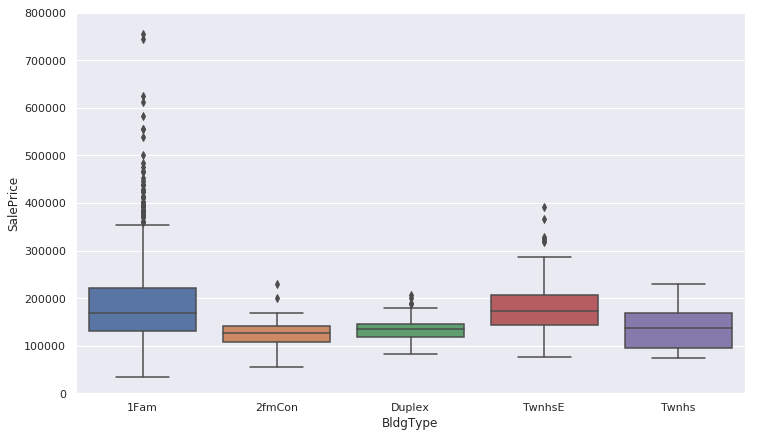

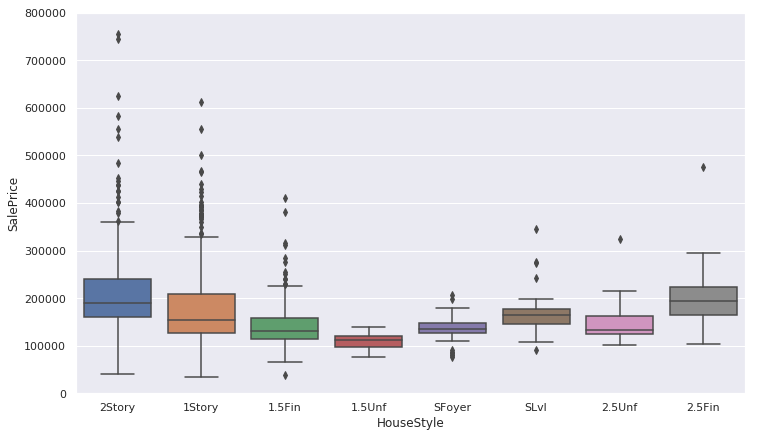

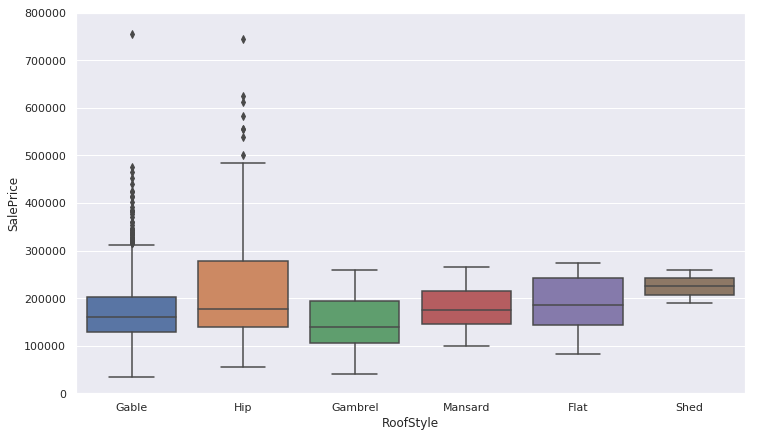

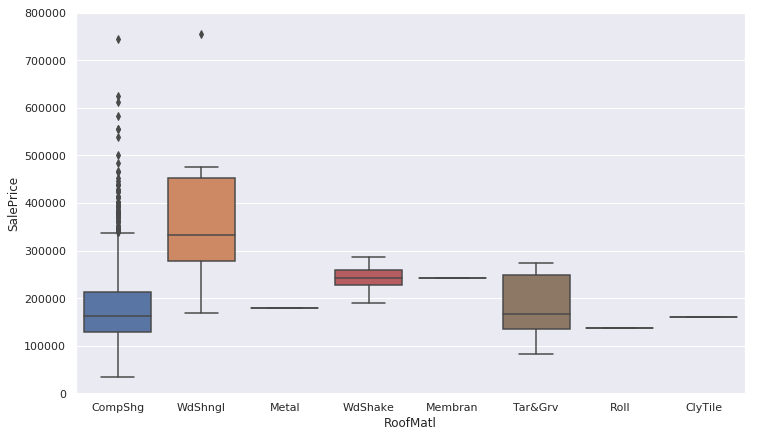

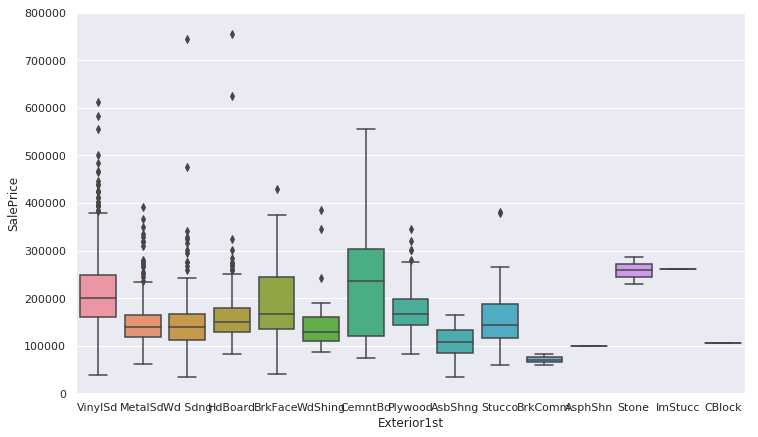

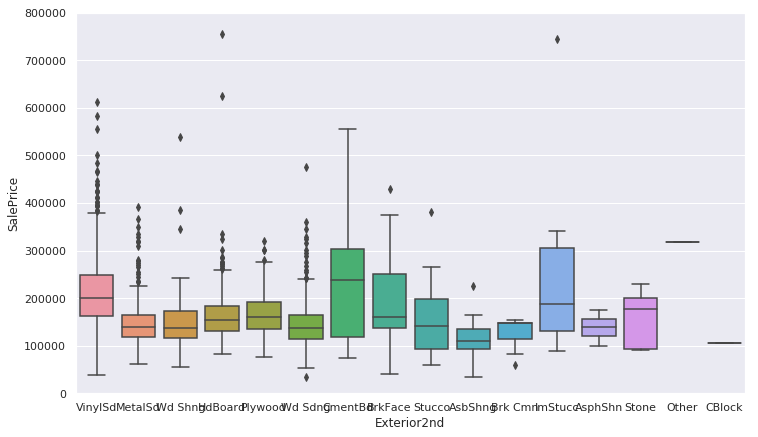

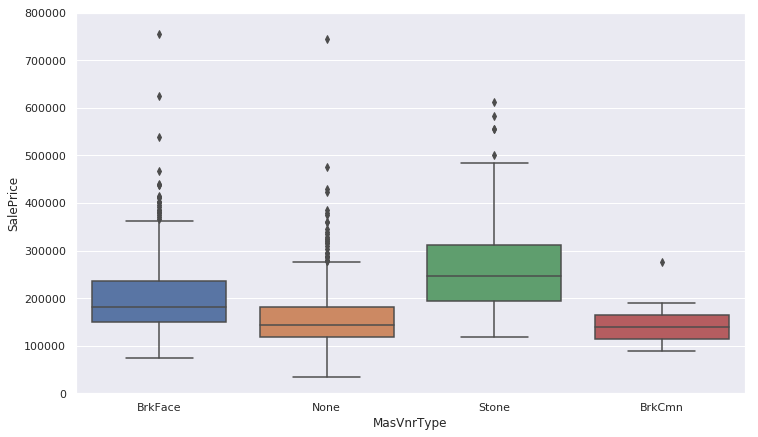

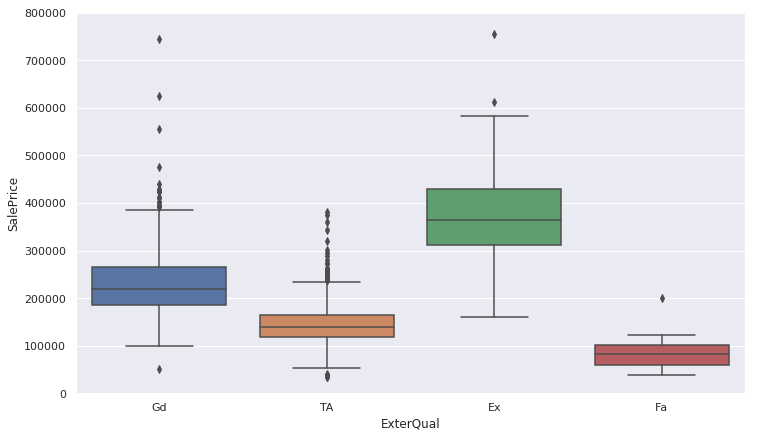

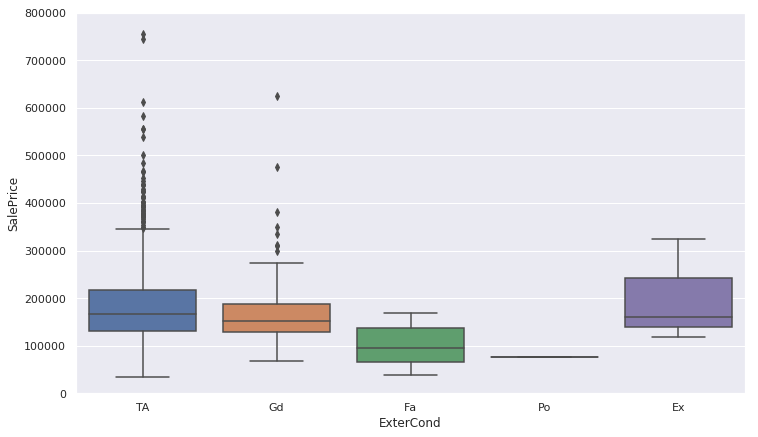

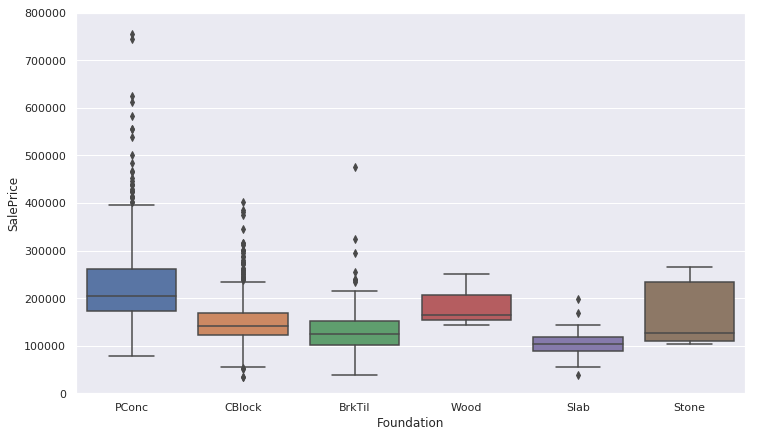

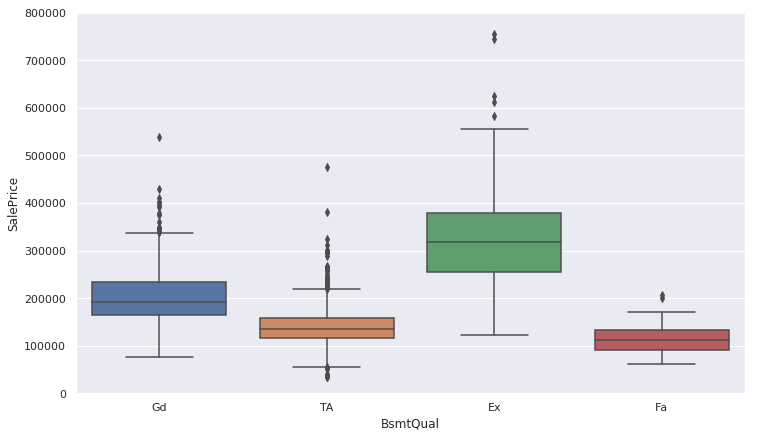

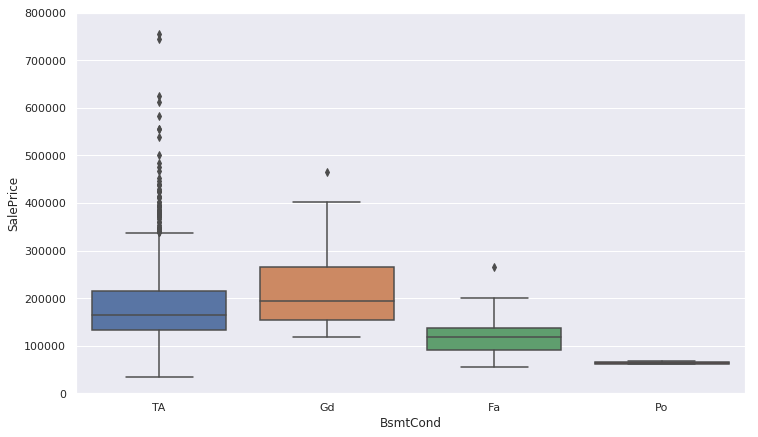

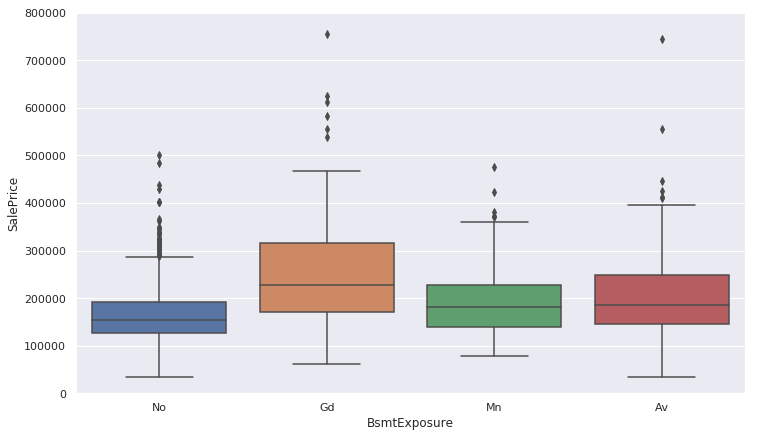

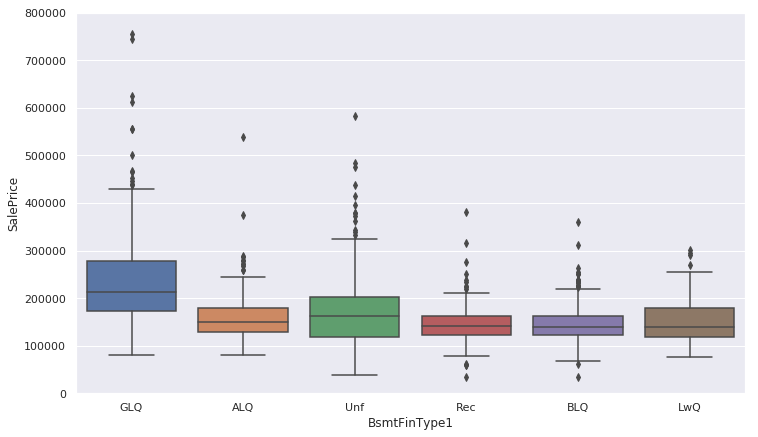

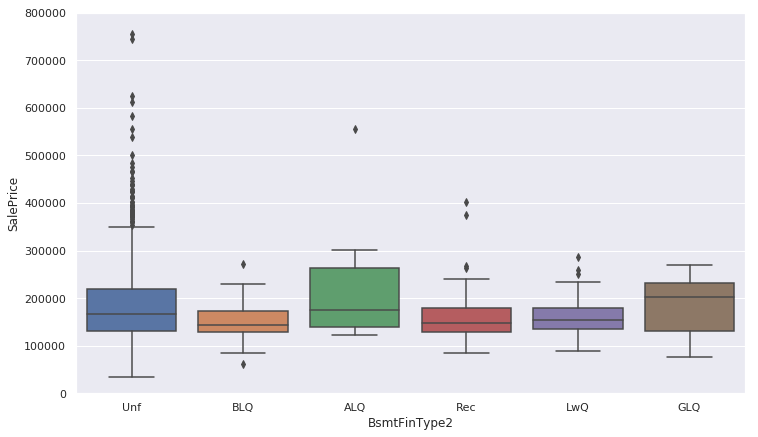

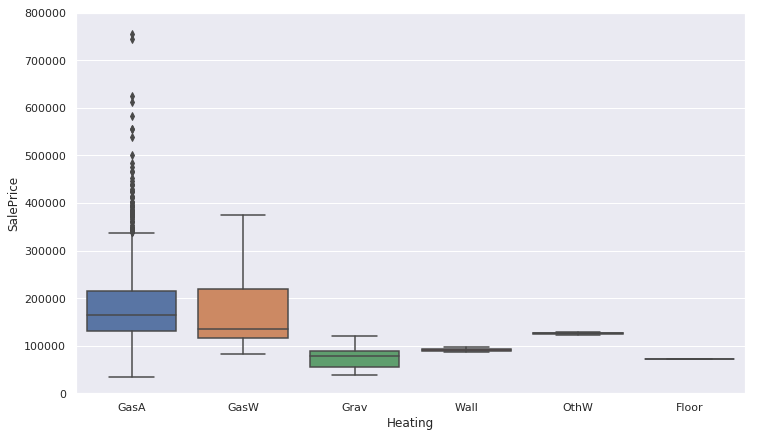

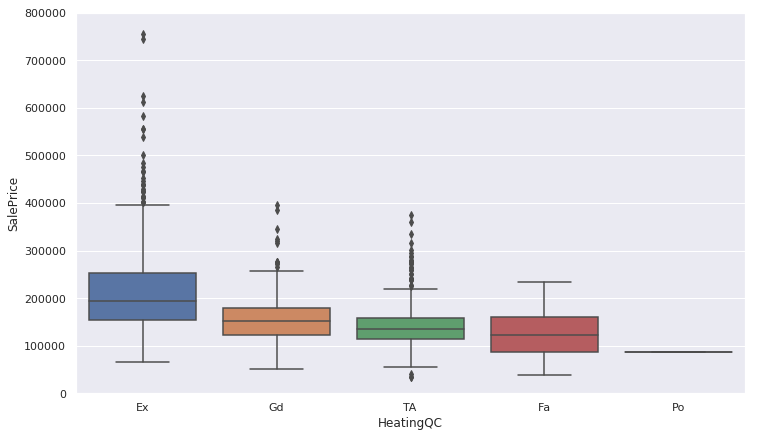

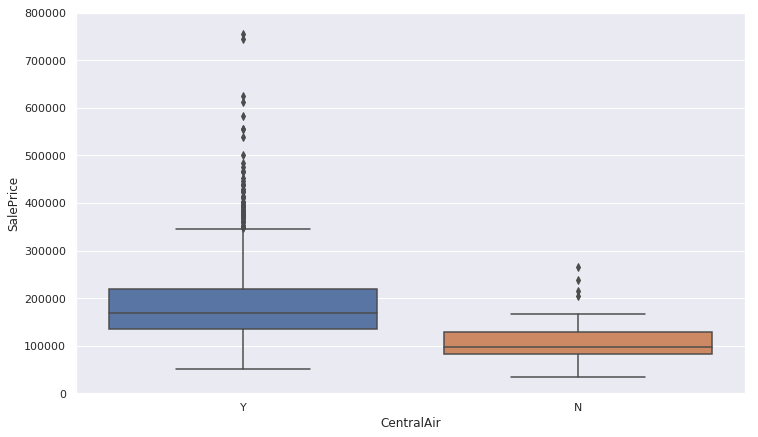

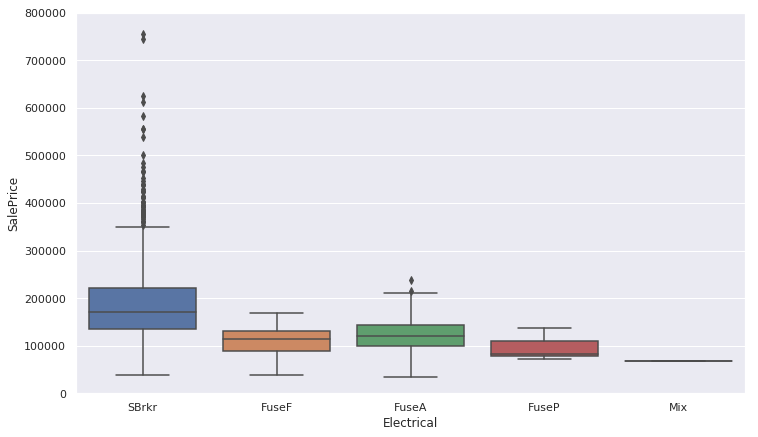

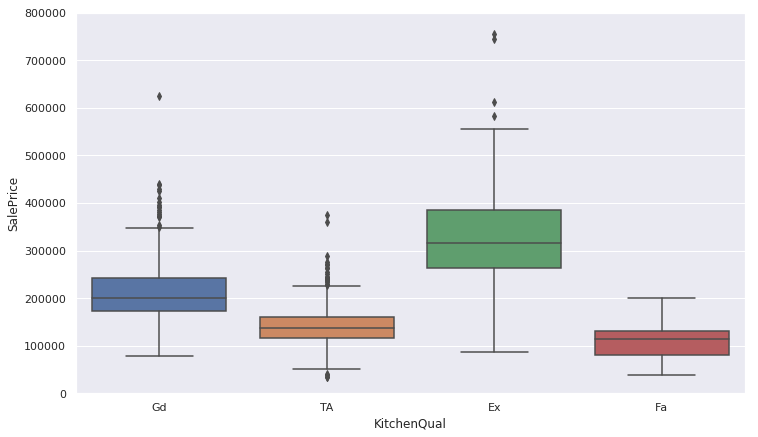

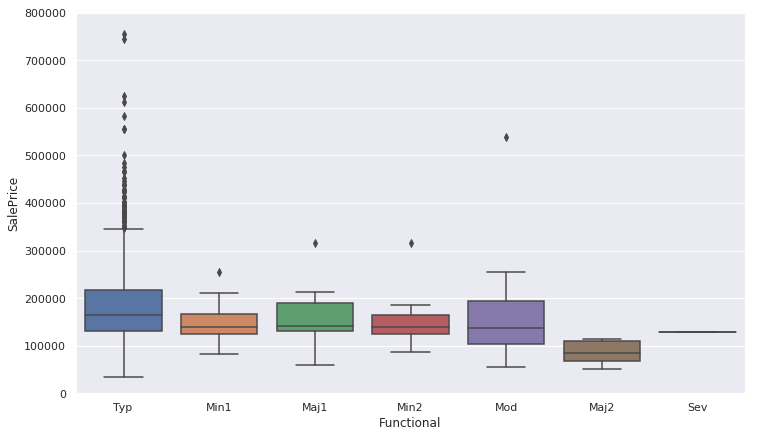

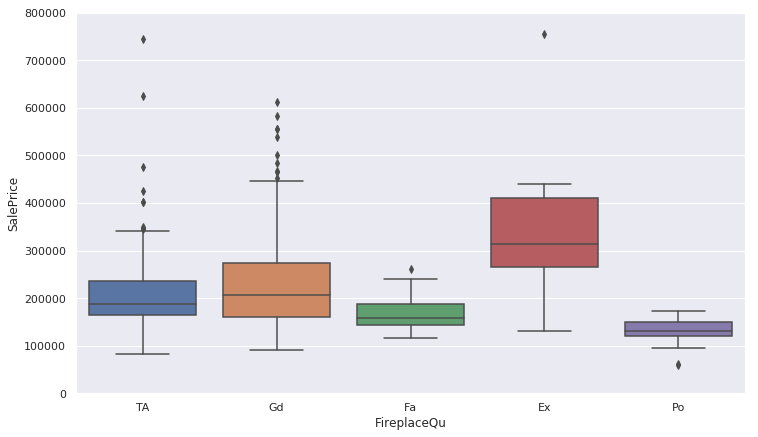

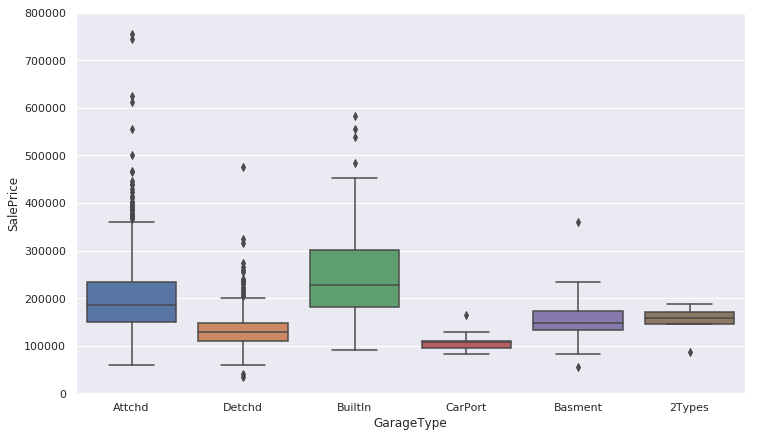

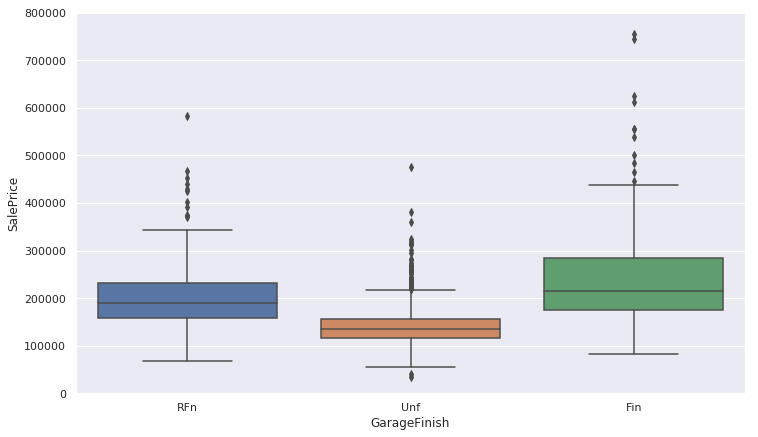

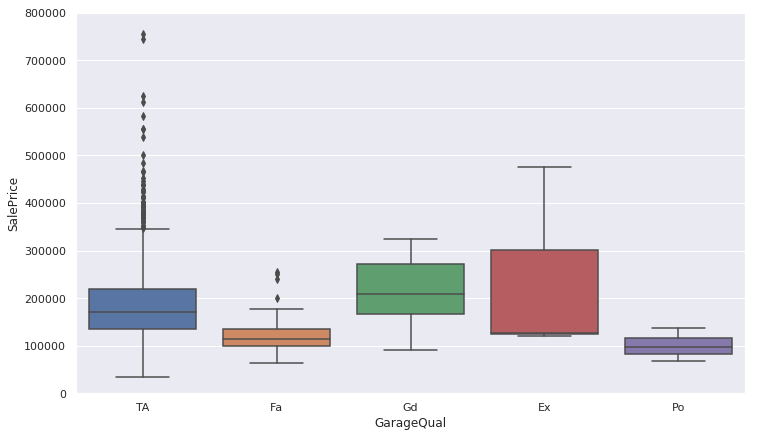

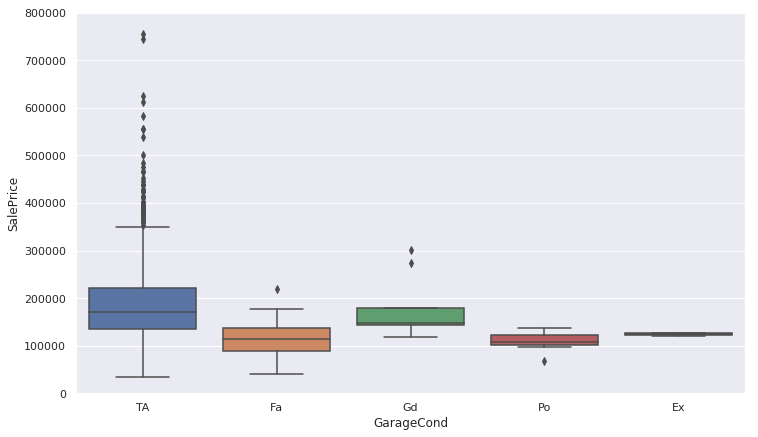

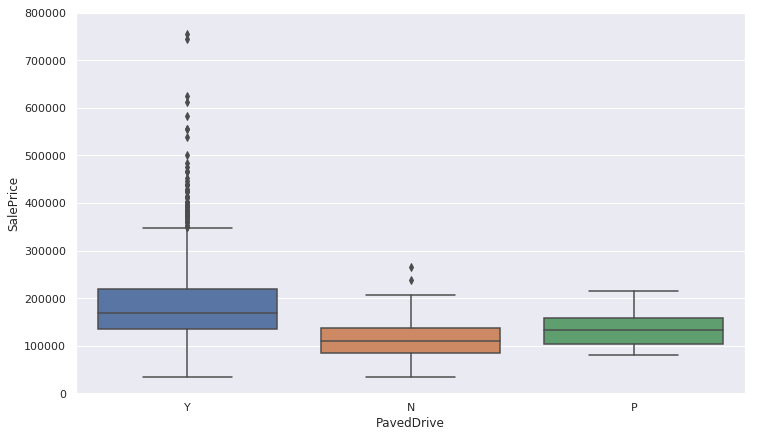

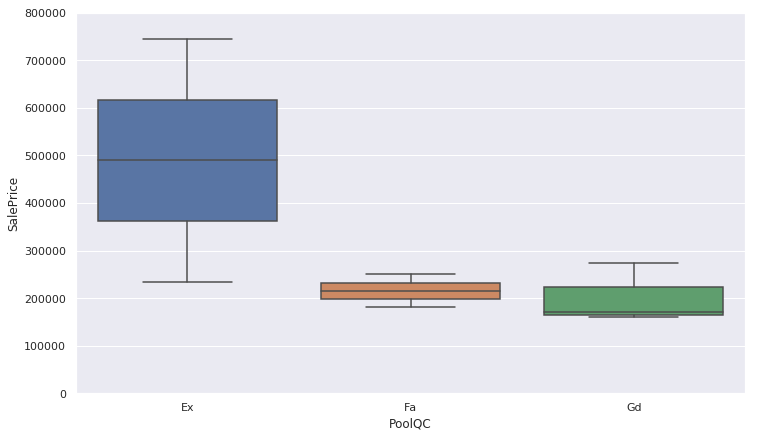

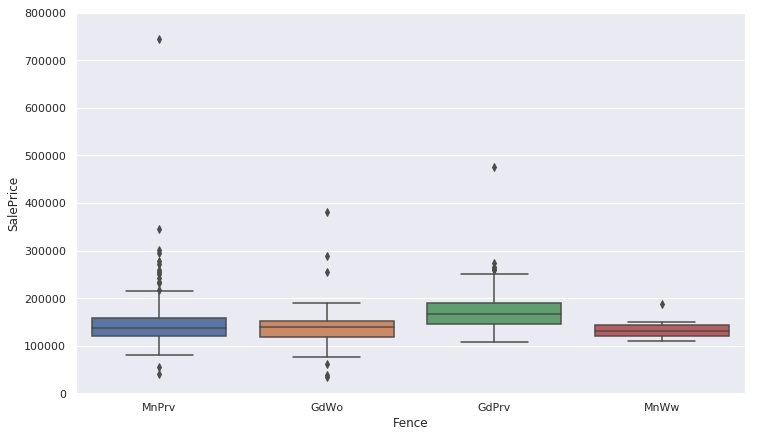

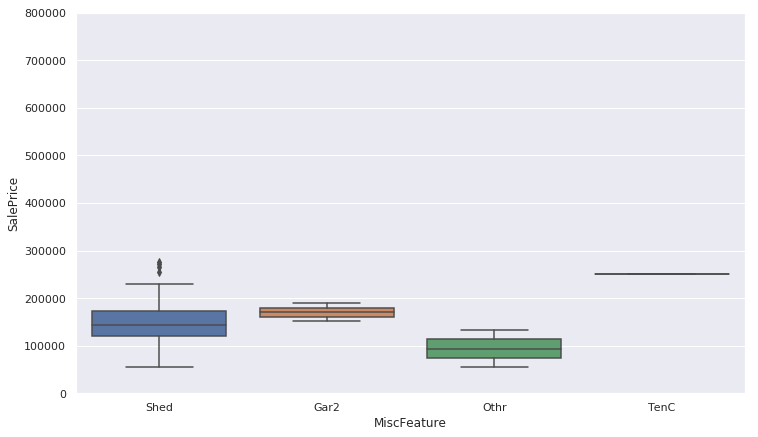

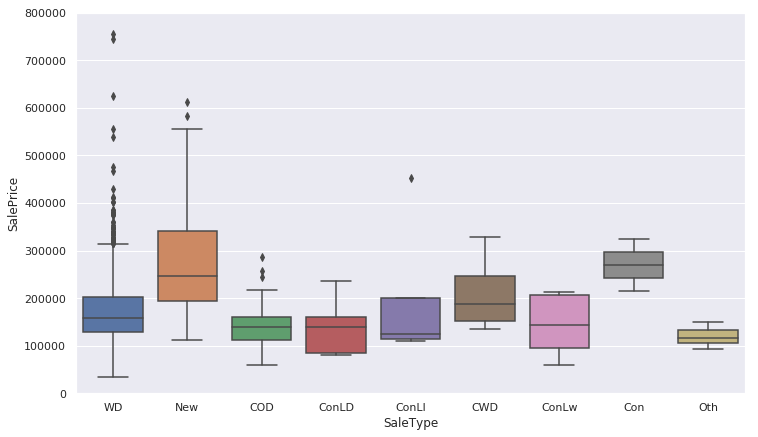

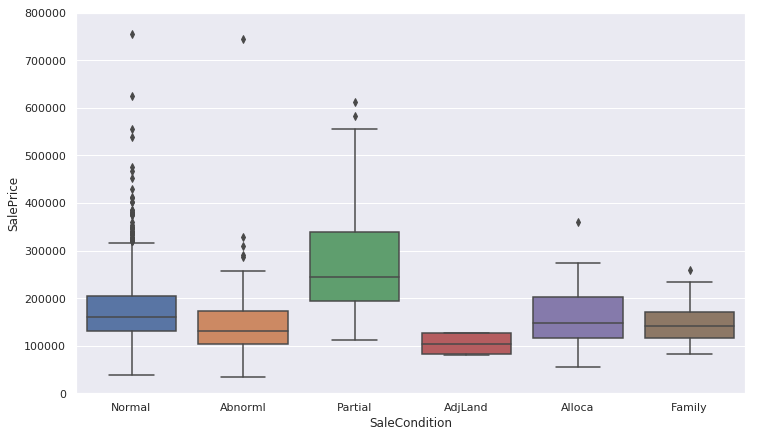

In [18]:
## Call custom pairplotting function for categorical variables
pair_plot(df_train, 'SalePrice', dtype='cat')

---
* Well there are obviously tons of useful predictors after looking at these distributions and interactions between features.

* I have selected some to use in our machine learning model for predicting the sale price. So lets get started.

### Data Cleaning

* First lets take a look at missing or null values for features.

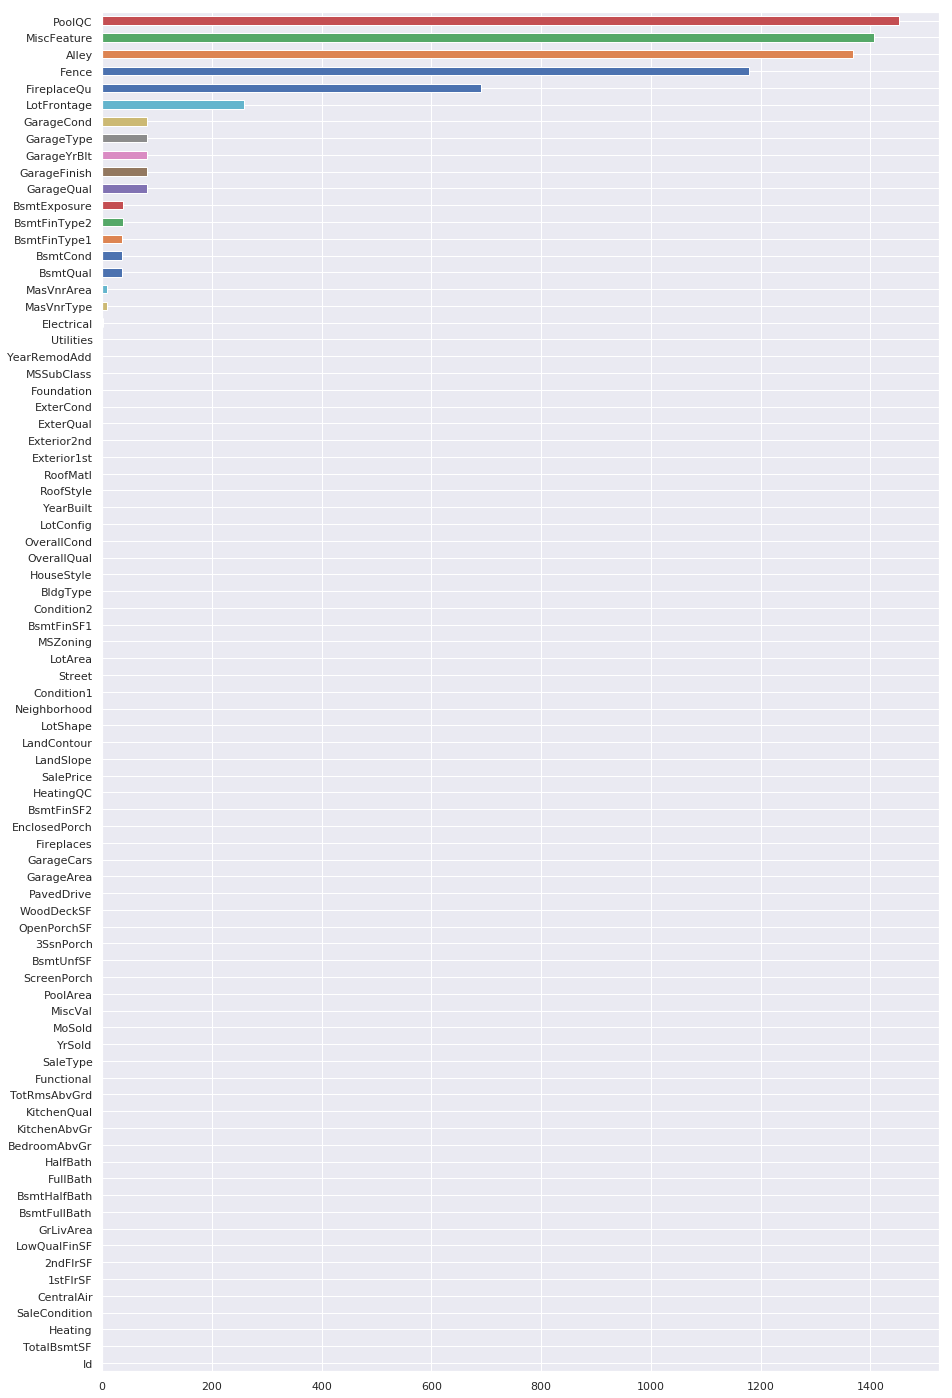

In [32]:
## Reset global plot size
sns.set(rc={'figure.figsize':(15, 25)})
df_train.isna().sum().sort_values(ascending=True).plot('barh')

### Dropping Features

* After reviewing our missing/null data we can choose to drop some features. 

* Choosing a threshold depends on the situation and sometimes even preference. If we chose to drop columns with greater than `10%` null values we would drop some features like `LotFrontage`, and although this feature may not be the best predictor for `SalePrice` it certainly does correlate with it. 

* The lesson here is even if the feature has a lot of null values, these may be valuable as well. Sometimes no data is actually tons of data!

* Most of the features with large amounts of null values we will drop however.

In [33]:
## Reset global plot size
sns.set(rc={'figure.figsize':(15, 10)})

## Load in test set
train = df_train
test = pd.read_csv('../input/test.csv')

### Removing Outliers

* After inspecting each features distribution and their interactions with the target variable, I noticed some outliers. These can have large impacts on the training of our model. It is good practice to remove these.

* Example of outliers below.

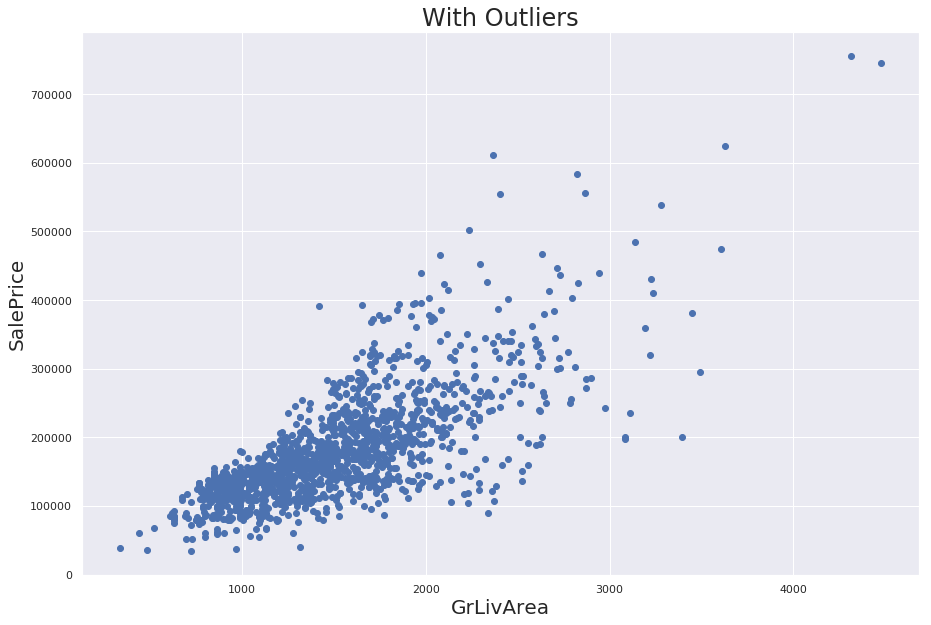

In [46]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], 
           y = train['SalePrice'])

plt.title('With Outliers', 
           fontsize=24, 
            style='normal')

plt.ylabel('SalePrice', 
           fontsize=20)

plt.xlabel('GrLivArea', 
           fontsize=20)
plt.show()

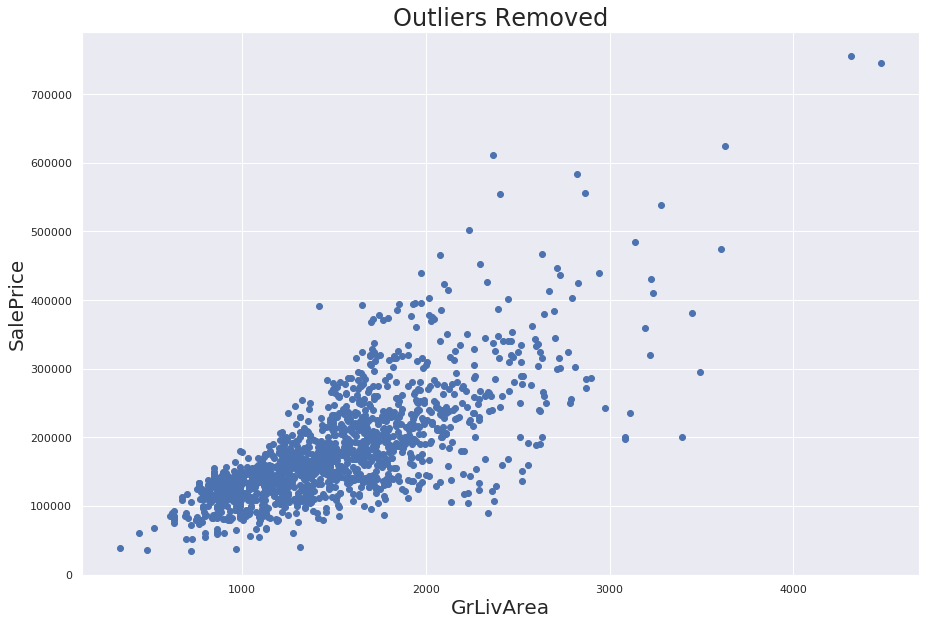

In [47]:
## Removing Outliers From Training Set
train = train.drop(train[(train['GrLivArea'] > 3750) & (train['SalePrice'] < 400000)].index)

## Plot After Outlier Removal
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], 
           train['SalePrice'])

plt.title('Outliers Removed', 
           fontsize=24, 
            style='normal')

plt.ylabel('SalePrice', 
           fontsize=20)

plt.xlabel('GrLivArea', 
           fontsize=20)
plt.show()

### Feature Transformation

* If you recall from before our target variable of `SalePrice` had a right skewed distribution. We can visualize how this looks with a QQ plot.

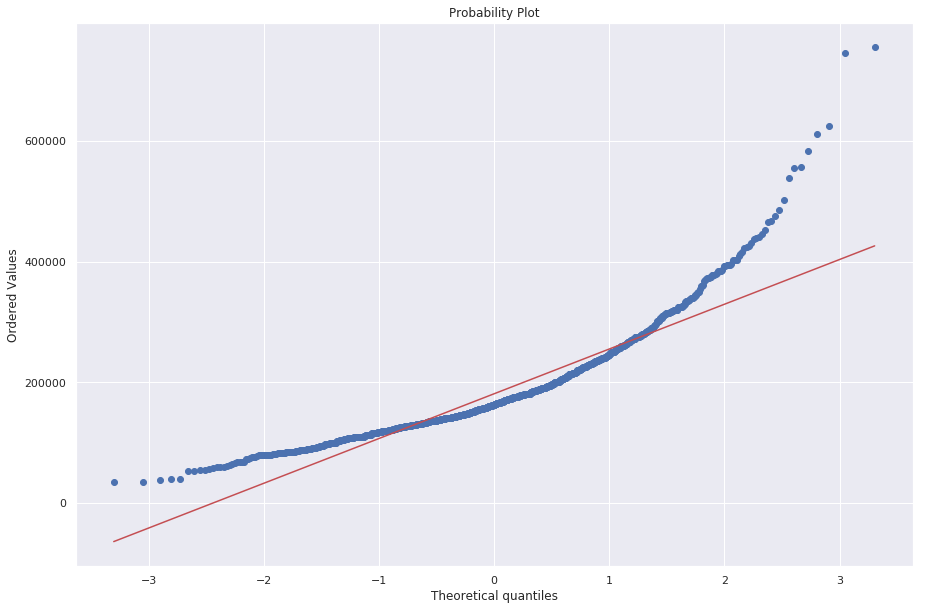

In [49]:
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], 
                     plot=plt)

### Log Transormation

* This is a statistical method to transform a distribution towards more centered.

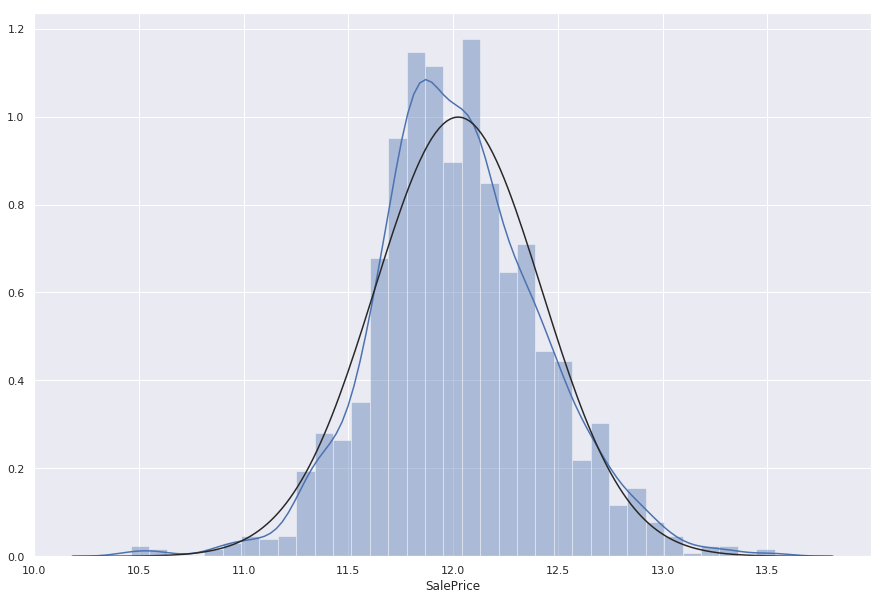

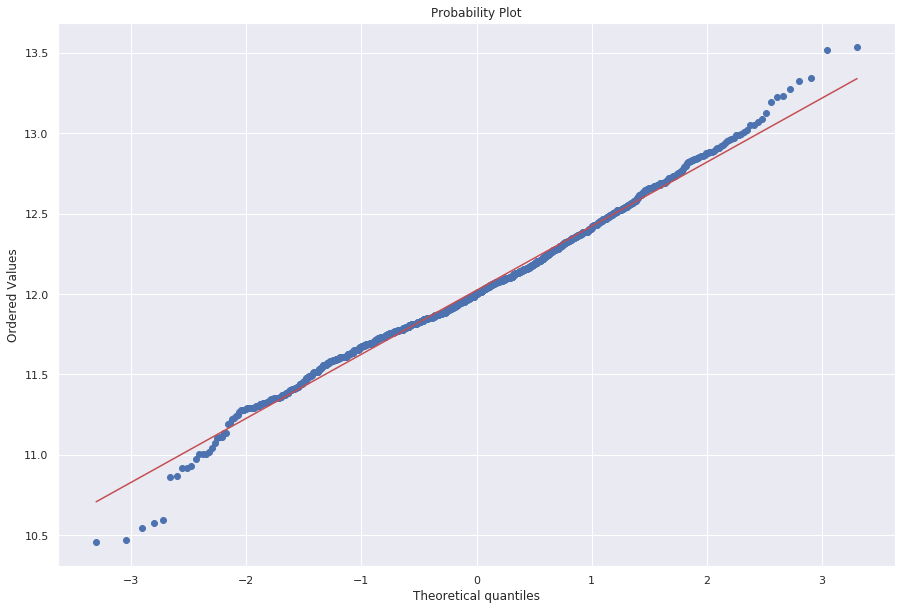

In [50]:
## Log Transformation On Target Feature
df_train['SalePrice'] = np.log(df_train['SalePrice'])

## Plot Distribution After Transformation
sns.distplot(df_train['SalePrice'], 
             fit=norm);

## Plot QQ After Transformation
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], 
                     plot=plt)

* It's fun to do magic sometimes!

* Now that the data is ready to work with, lets build a model now and see if we can get a baseline. 

* I will be using the XGBoost package which is a ensemble of gradient boosted decision trees.
---

In [81]:
df_train.dropna(axis=0, 
                subset=['SalePrice'], 
                inplace=True)

y = df_train.SalePrice
X = df_train.drop(['SalePrice'], 
                  axis=1).select_dtypes(exclude=['object'])

train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), 
                                                    y.as_matrix(), 
                                                    test_size=0.20)

## Impute And Transform Data
my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X  = my_imputer.transform(test_X)

## Initialize And Fit Baseline Model
baseline_model = XGBRegressor(n_estimators=5)
baseline_model.fit(train_X, train_y, verbose=False)

[03:48:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=5,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

* We can now test our predictions on the hold out set and see how we do.

* I chose to use Mean Absolute Error as an evaluation metric. Seemed like a good metric to start with.

In [82]:
predictions = baseline_model.predict(test_X)
print("MAE: "+str(mean_absolute_error(predictions, test_y)))

MAE: 6.78697472624802


* Now we can tune some of our hyperparameters such as number of trees, depth of trees, early stopping rounds, and even learning rate to see if we can lower our error rate.

In [85]:
model_2 = XGBRegressor(n_estimators=10, 
                      learning_rate=0.2)

model_2.fit(train_X, train_y, 
            early_stopping_rounds=5, 
            eval_set=[(test_X, test_y)], 
            verbose=False)

predictions = model_2.predict(test_X)
print("MAE: "+str(mean_absolute_error(predictions, test_y)))

[03:50:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 1.2332102196859047


* That is already much better! Lets tune a little more just for fun.

In [93]:
model_3 = XGBRegressor(n_estimators=1000, 
                        learning_rate=0.05)

model_3.fit(train_X, train_y,
             early_stopping_rounds=5,
             eval_metric='mae',
             eval_set=[(test_X, test_y)], verbose=False)

predictions = model_3.predict(test_X)
print("MAE: "+str(mean_absolute_error(predictions, test_y)))

[04:01:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.08561898830005749


* Incredible, that seems like a pretty low error rate with just a few tweaks to the data and a couple hyperparameters tuned. 

* We can also take our model outputs and plot our mean absolute error over time through the training process.

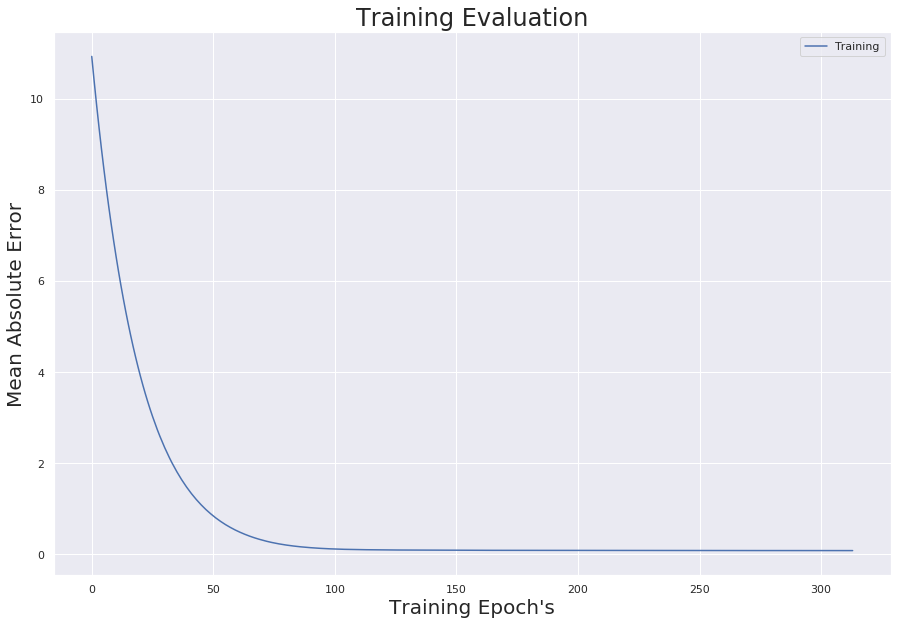

In [120]:
results = model_3.evals_result()
epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
## Reset global plot size
sns.set(rc={'figure.figsize':(15, 10)})
ax.plot(x_axis, results['validation_0']['mae'], 
        label='Training')
ax.legend()
ax.set_ylabel('Mean Absolute Error', fontsize=20)
ax.set_xlabel("Training Epoch's", fontsize=20)
ax.set_title("Training Evaluation", fontsize=24)
fig.show()

---
### Where To Go From Here

* As I continue to work on this problem I would try different features, different training and test set sizes, and optimizing the hyperparameters.

* After I am comfortable with this model, I would train another model maybe logit regression or even ridge regression etc. I could then take several models that are very different and bag or blend their predictions to strengthen the end predictions.

* Don't worry I won't make you sit through all of that...

### I hope you enjoyed my visualization and prediction project!